In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the libraries

%matplotlib inline
import numpy as np
import regionmask
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xcdat as xc
import xarray as xr
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
from scipy import stats

In [4]:
import seaborn as sns

In [5]:
mpl.rcParams['font.family'] = 'Droid Sans'
mpl.rcParams['font.size'] = 12
# Edit axes parameters
mpl.rcParams['axes.linewidth'] = 1.5
# Tick properties
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'

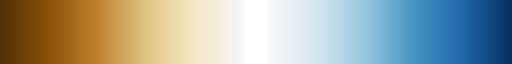

In [6]:
n = 35
diff = 0.5
cmap = plt.cm.BrBG
cmap2 = plt.cm.RdBu
lower = cmap(np.linspace(0, diff, n))
white = np.ones((2, 4))
upper = cmap2(np.linspace(1-diff, 1, n))
colors = np.vstack((lower, white, white, upper))
BrBU = mpl.colors.LinearSegmentedColormap.from_list('map_white', colors)
BrBU

In [7]:
raw = xr.open_dataset('./data/result/raw.nc')
raw

<xarray.Dataset>
Dimensions:  (time: 1380, region: 46, model: 52)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2014-12-16T12:00:00
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
Data variables:
    precip   (time, region, model) float64 ...
    nino     (time, region, model) float64 ...
    dmi      (time, region, model) float64 ...

In [8]:
out = xr.open_dataset('./data/result/out_conc.nc')

In [9]:
out['enc'] = out.nino - out.neut
out['lnc'] = out.nina - out.neut
out['asymm'] = (out.enc + out.lnc)/2
out['symm'] = (out.enc - out.lnc)/2

In [10]:
out['asymm_pval'] = xr.where((out.enc_pval > 0.05) & (out.lnc_pval > 0.05), 0, 1)

In [11]:
out

<xarray.Dataset>
Dimensions:      (model: 52, region: 46, season: 5)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
  * region       (region) object 'Greenland/Iceland' ... 'W.Antarctica'
  * season       (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables: (12/18)
    std_dev      (model, region, season) float64 ...
    clim         (model, region, season) float64 ...
    corr_coef    (model, region, season) float64 ...
    pval         (model, region, season) float64 ...
    nino         (model, region, season) float64 ...
    nina         (model, region, season) float64 ...
    ...           ...
    threshold    (model) float64 ...
    enc          (model, region, season) float64 0.3218 0.01204 ... 0.02449
    lnc          (model, region, season) float64 -0.09092 -0.1126 ... -0.08654
    asymm        (model, region, season) float64 0.1155 -0.05029 ... -0.03103
    symm         (model, region, season) float64 0.2064 0.06233 ... 0.05551
    asymm_pval   (model, region, season) int64 0 0 0 0 0 1 1 0 ... 0 0 0 0 1 0 0

## effect of model resolution

In [12]:
import pandas as pd

In [13]:
model_res = pd.read_csv('./util/model_res_table_updated.csv')

In [14]:
model_res

model  natNomRes atmos  natNomRes Ocean  native_atmos_grid_lon  \
0         ACCESS-CM2              250              100                    1.9   
1      ACCESS-ESM1-5              250              100                    1.9   
2      AWI-CM-1-1-MR              100               25                    0.9   
3     AWI-ESM-1-1-LR              250               50                    1.9   
4        BCC-CSM2-MR              100               50                    1.1   
5           BCC-ESM1              250               50                    2.8   
6        CAMS-CSM1-0              100              100                    1.1   
7         CAS-ESM2-0              100              100                    1.4   
8              CESM2              100              100                    1.3   
9          CESM2-FV2              250              100                    2.5   
10       CESM2-WACCM              100              100                    1.3   
11   CESM2-WACCM-FV2              250              100                    2.5   
12      CMCC-CM2-HR4              100               25                    1.3   
13      CMCC-CM2-SR5              100              100                    1.3   
14        CNRM-CM6-1              250              100                    1.4   
15     CNRM-CM6-1-HR              100               25                    0.5   
16       CNRM-ESM2-1              250              100                    1.4   
17           CanESM5              500              100                    2.8   
18          E3SM-1-1              100               50                    1.0   
19      E3SM-1-1-ECA              100               50                    1.0   
20         EC-Earth3              100              100                    0.7   
21     EC-Earth3-Veg              100              100                    0.7   
22  EC-Earth3-Veg-LR              250              100                    1.1   
23       FGOALS-f3-L              100              100                    1.3   
24         FGOALS-g3              250              100                    2.0   
25          GFDL-CM4              100               25                    1.3   
26         GFDL-ESM4              100               50                    1.3   
27       GISS-E2-1-G              250              100                    2.5   
28    GISS-E2-1-G-CC              250              100                    2.5   
29       GISS-E2-1-H              250              100                    2.5   
30   HadGEM3-GC31-LL              250              100                    1.9   
31   HadGEM3-GC31-MM              100               25                    0.8   
32          IITM-ESM              250              100                    1.9   
33         INM-CM4-8              100              100                    2.0   
34         INM-CM5-0              100               50                    2.0   
35      IPSL-CM6A-LR              250              100                    2.5   
36        KACE-1-0-G              250              100                    1.9   
37        MIROC-ES2L              500              100                    2.8   
38            MIROC6              250              100                    1.4   
39   MPI-ESM-1-2-HAM              250              250                    1.9   
40     MPI-ESM1-2-HR              100               50                    0.9   
41     MPI-ESM1-2-LR              250              250                    1.9   
42        MRI-ESM2-0              100              100                    1.1   
43             NESM3              250              100                    1.9   
44           NorCPM1              250              100                    2.5   
45        NorESM2-LM              250              100                    2.5   
46        NorESM2-MM              100              100                    1.3   
47       SAM0-UNICON              100              100                    1.3   
48           TaiESM1              100         

In [15]:
out.isel(region=37)

<xarray.Dataset>
Dimensions:      (model: 52, season: 5)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
    region       <U6 'S.Asia'
  * season       (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables: (12/18)
    std_dev      (model, season) float64 ...
    clim         (model, season) float64 ...
    corr_coef    (model, season) float64 ...
    pval         (model, season) float64 ...
    nino         (model, season) float64 ...
    nina         (model, season) float64 ...
    ...           ...
    threshold    (model) float64 ...
    enc          (model, season) float64 -0.8625 0.1713 ... -0.3701 -0.1054
    lnc          (model, season) float64 -0.2094 -0.492 -0.2362 ... 0.2451 0.234
    asymm        (model, season) float64 -0.5359 -0.1604 ... -0.0625 0.0643
    symm         (model, season) float64 -0.3266 0.3317 ... -0.3076 -0.1697
    asymm_pval   (model, season) int64 1 1 1 1 1 1 0 1 1 1 ... 1 0 1 1 1 0 0 1 1

In [16]:
corr_bias = np.abs(out.isel(model=slice(0, -2), region=39, season=0).corr_coef - out.isel(model=-2, region=39, season=0).corr_coef)
asymm_bias = np.abs(out.isel(model=slice(0, -2), region=39, season=0).asymm - out.isel(model=-2, region=39, season=0).asymm)

PearsonRResult(statistic=0.06362603712105099, pvalue=0.6606833350301828)

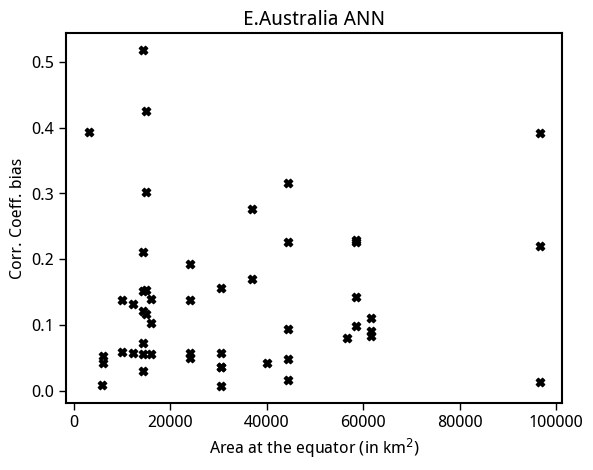

In [17]:
plt.scatter(model_res['area_at_equator'], corr_bias, marker='X', color='k')
plt.ylabel('Corr. Coeff. bias')
plt.xlabel('Area at the equator (in km$^{2}$)')
plt.title('E.Australia ANN')
stats.pearsonr(model_res['area_at_equator'], corr_bias)

PearsonRResult(statistic=0.1577228833661153, pvalue=0.27398771560743207)

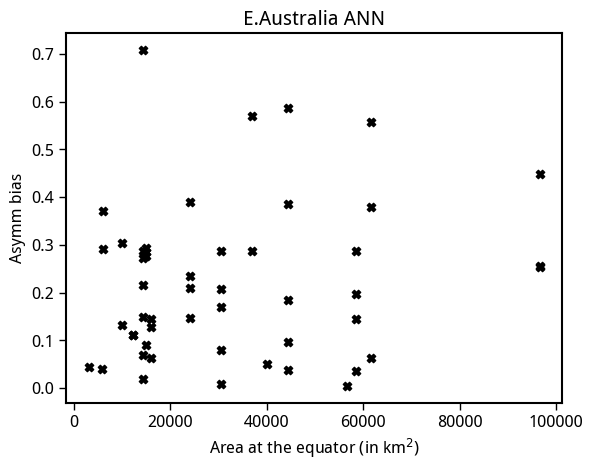

In [18]:
plt.scatter(model_res['area_at_equator'], asymm_bias, marker='X', color='k')
plt.ylabel('Asymm bias')
plt.xlabel('Area at the equator (in km$^{2}$)')
plt.title('E.Australia ANN')
stats.pearsonr(model_res['area_at_equator'], asymm_bias)

In [14]:
####
from dateutil.relativedelta import relativedelta

def reorder(da):
    da['time'] = pd.date_range('1900-01-01', '2015-01-01', freq='1M')

    custom = da.sel(time=da.time.dt.month.isin([6,7,8,9,10,11,12,1,2,3,4,5]))
    # convert cftime to datetime
    datetimeindex = custom.indexes['time']#.to_datetimeindex() 
    # custom['time'] = pd.to_datetime(datetimeindex)
    
    # Add custom group by year functionality
    custom_year = custom['time'].dt.year
    
    # convert time type to pd.Timestamp
    time1 = [pd.Timestamp(i) for i in custom_year['time'].values] 
    # time1 = [pd.Timestamp(i) for i in custom_year['time'].values] 
    
    # Add year to Timestamp objects when month is before Jan. (relativedelta does not work from np.datetime64)
    time2 = [i + relativedelta(years=1) if i.month>=6 else i for i in time1] 
    custom['time'] = time2
    return custom

####


def calc_anom(
    input_da,
    base_start_date: str = "1960-01-01",
    base_end_date: str = "1990-01-01",
    start_year: str = "1900-01-01",
    end_year: str = "2015-01-01",
    # var = "Temperature",
    # units = 'K'
):

    # define the base climatology
    base_clim = input_da.sel(time=slice(base_start_date, base_end_date))

    # calculate the monthly climatology for the base years
#     da_clim_coarsen = base_clim.coarsen(time=12)
    da_clim = base_clim.groupby("time.month").mean("time")
    da_anom = input_da.sel(time = slice(start_year, end_year)).groupby("time.month") - da_clim
    
    return da_anom

####

In [15]:
# Function to preprocess the regridded data

from statsmodels.tsa.seasonal import STL
# import pymannkendall as mk

def detrend1d(arr, period = 9*12):
    res = STL(arr, period = period).fit()
    arr_det = arr - res.trend
    return arr_det
    
def detrend1d_check(arr, period = 9):
    # if np.nansum(arr) != 0:
    #     trend = mk.hamed_rao_modification_test(arr).trend
    # else:
    #     trend = 'no trend'
    # if trend != 'no trend':
    #     res = STL(arr, period = period).fit()
    #     arr_det = arr - res.trend
    #     return arr_det
    # else:
    #     return arr
    res = STL(arr, period = period).fit()
    arr_det = arr - res.trend
    return arr_det

# def detrend_separate(da, period=9):
#     trend = da.rolling(time = period*12).mean('time')
#     da_detrend = da - trend
#     return da_detrend
def detrend_separate(da, dim):
    return xr.apply_ufunc(detrend1d, da, input_core_dims=[[dim]], output_core_dims=[[dim]])
    
def detrend_separate_check(da, dim):
    return xr.apply_ufunc(detrend1d_check, da, input_core_dims=[[dim]], output_core_dims=[[dim]])

In [16]:
from scipy import stats

In [17]:
skw_res = xr.open_dataset('./data/result/skw.nc')

In [21]:
# find high res and low res models
model_res[model_res['area_at_equator'] == np.min(model_res['area_at_equator'])]

model  natNomRes atmos  natNomRes Ocean  native_atmos_grid_lon  \
15  CNRM-CM6-1-HR              100               25                    0.5   

    native_atmos_grid_lat  area_at_equator  
15                    0.5          3080.25

In [22]:
model_res[model_res['area_at_equator'] == np.max(model_res['area_at_equator'])]

model  natNomRes atmos  natNomRes Ocean  native_atmos_grid_lon  \
5     BCC-ESM1              250               50                    2.8   
17     CanESM5              500              100                    2.8   
37  MIROC-ES2L              500              100                    2.8   

    native_atmos_grid_lat  area_at_equator  
5                     2.8         96596.64  
17                    2.8         96596.64  
37                    2.8         96596.64

In [26]:
pra_obs = calc_anom(raw.isel(model = -2, region=41).precip)
skw_obs = skw_res.isel(region = 41).sel(season='ANN', model='obs').pr_skw
asymm_obs = out.isel(region=41).sel(season='ANN', model='obs').asymm
prd_obs = detrend_separate_check(reorder(pra_obs).groupby('time.year').mean('time'), dim='year').sel(year = slice('1900', '2015'))

In [27]:
pra_hr = calc_anom(raw.isel(region=41).sel(model = 'CNRM-CM6-1-HR').precip)
skw_hr = skw_res.isel(region = 41).sel(model = 'CNRM-CM6-1-HR', season='ANN').pr_skw
asymm_hr = out.isel(region=41).sel(model = 'CNRM-CM6-1-HR', season='ANN').asymm
prd_hr = detrend_separate_check(reorder(pra_hr).groupby('time.year').mean('time'), dim='year').sel(year = slice('1900', '2015'))

In [28]:
pra_lr = calc_anom(raw.isel(region=41).sel(model = 'BCC-ESM1').precip)
skw_lr = skw_res.isel(region = 41).sel(model = 'BCC-ESM1', season='ANN').pr_skw
asymm_lr = out.isel(region=41).sel(model = 'BCC-ESM1', season='ANN').asymm
prd_lr = detrend_separate_check(reorder(pra_lr).groupby('time.year').mean('time'), dim='year').sel(year = slice('1900', '2015'))

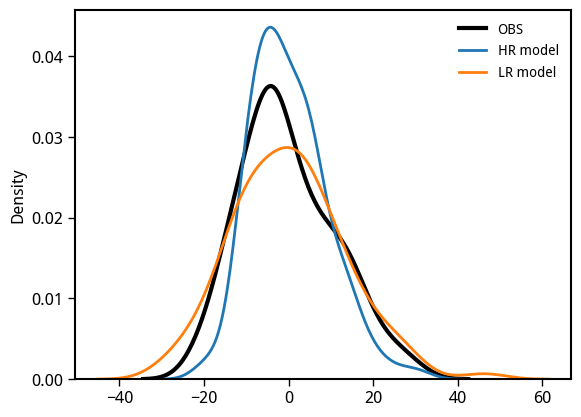

In [29]:
sns.kdeplot(prd_obs, lw = 3.0, label = 'OBS', color='k')
sns.kdeplot(prd_hr, lw = 2.0, label = 'HR model')
# sns.kdeplot(prd_hr2, lw = 2.0, label = 'HR model 2')
# sns.kdeplot(prd_hr2, lw = 2.0, label = 'HR model')
sns.kdeplot(prd_lr, lw = 2.0, label = 'LR model')
plt.legend(frameon=False, fontsize=10)

In [30]:
skw_obs.values, skw_hr.values, skw_lr.values

(array(0.47465978), array(0.65148446), array(0.40844375))

In [31]:
asymm_obs.values, asymm_hr.values, asymm_lr.values

(array(0.49228247), array(0.19304193), array(0.33113288))

In [32]:
# for all regions

In [20]:
def get_pearson_corr(x, y):
    res = stats.pearsonr(x, y)
    return res.statistic


def get_pearson_pval(x, y):
    res = stats.pearsonr(x, y)
    return res.pvalue


def corr_along_dim(da1, da2,  dim):
    return xr.apply_ufunc(get_pearson_corr, da1, da2, input_core_dims=[[dim], [dim]], vectorize=True, dask='parallelized')


def pval_along_dim(da1, da2,  dim):
    return xr.apply_ufunc(get_pearson_pval, da1, da2, input_core_dims=[[dim], [dim]], vectorize=True, dask='parallelized')

In [21]:
skw_bias = np.abs(skw_res.isel(model=slice(0, -2), region=slice(0, -2)) - skw_res.isel(model = -2, region=slice(0, -2))).pr_skw
asymm_bias = np.abs(out.isel(model=slice(0, -2), region=slice(0, -2)) - out.isel(model = -2, region=slice(0, -2))).asymm

In [22]:
model_res_da = model_res.set_index('model').to_xarray()['area_at_equator']
model_res_da

<xarray.DataArray 'area_at_equator' (model: 50)>
array([30432.87, 30432.87,  9980.01, 44478.81, 14908.41, 96596.64,
       14908.41, 24149.16, 14415.57, 58524.75, 14415.57, 58524.75,
       14415.57, 14415.57, 24149.16,  3080.25, 24149.16, 96596.64,
       12321.  , 12321.  ,  6037.29,  6037.29, 14908.41, 16017.3 ,
       56676.6 , 16017.3 , 16017.3 , 61605.  , 61605.  , 61605.  ,
       30432.87,  5914.08, 44478.81, 36963.  , 36963.  , 40043.25,
       30432.87, 96596.64, 24149.16, 44478.81,  9980.01, 44478.81,
       14908.41, 44478.81, 58524.75, 58524.75, 14415.57, 14415.57,
       14415.57, 30432.87])
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'

In [36]:
corr_modelres_skw = corr_along_dim(model_res_da, skw_bias, 'model')
pval_modelres_skw = pval_along_dim(model_res_da, skw_bias, 'model')

corr_modelres_asymm = corr_along_dim(model_res_da, asymm_bias, 'model')
pval_modelres_asymm = pval_along_dim(model_res_da, asymm_bias, 'model')

In [22]:
def plot_heatmap(da_var, da_pval, var, pval_var, vmin, vmax, cmap, cbar_label='Corr Coef.'):
    df_var = da_var.to_dataset(name=var).to_dataframe().pivot_table(values=var, index='region', columns='season')
    df_pval = da_pval.to_dataset(name=pval_var).to_dataframe().pivot_table(values=pval_var, index='region', columns='season')
    sns.heatmap(df_var, cmap=cmap, vmin=vmin, vmax=vmax, linewidths=1.0, linecolor='white', cbar_kws={"shrink": 0.5, "pad": 0.02, "label": cbar_label, "extend":'both', })
    # plotting sign
    zm = np.ma.masked_greater_equal(df_pval.values, 0.05)
    x, y, = np.arange(len(df_pval.columns) + 1), np.arange(len(df_pval.index) + 1)
    plt.pcolor(x, y, zm, hatch='////', alpha=0.)

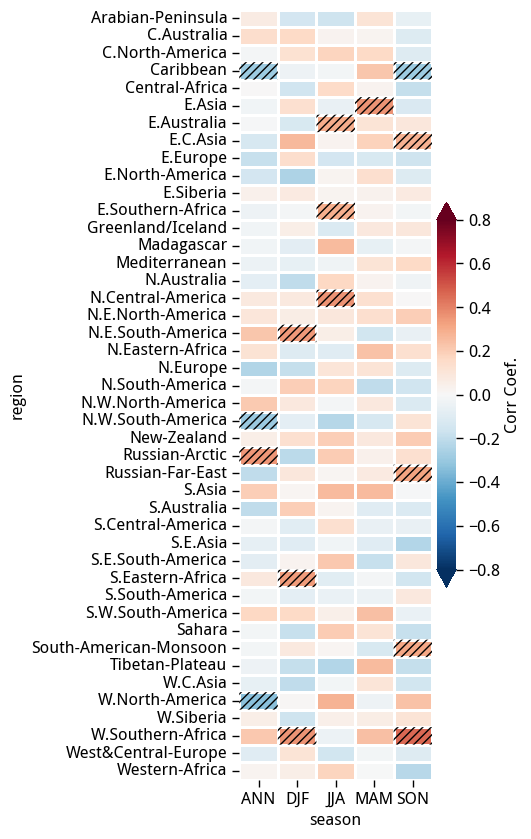

In [41]:
plt.figure(figsize=(3,10))
plot_heatmap(corr_modelres_skw, pval_modelres_skw, 'corr_skw', 'pval_skw', vmin=-0.8, vmax=0.8, cmap='RdBu_r')
plt.savefig('./images/review_extra/model_res_skw_corr.png', dpi=300, bbox_inches='tight')

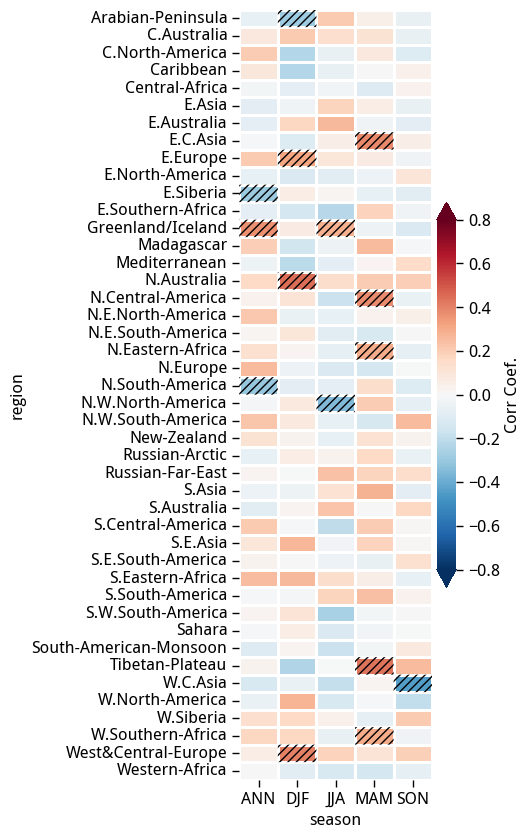

In [42]:
plt.figure(figsize=(3,10))
plot_heatmap(corr_modelres_asymm, pval_modelres_asymm, 'corr_asymm', 'pval_asymm', vmin=-0.8, vmax=0.8, cmap='RdBu_r')
plt.savefig('./images/review_extra/model_res_asymm_corr.png', dpi=300, bbox_inches='tight')

##### using a HR and LR model to compare the effects of downscaling -> HadGEM3-GC31-MM and CNRM-CM6-1-HR [checking the effect on rainfall distribution]

In [24]:
model_res.sort_values('area_at_equator')

model  natNomRes atmos  natNomRes Ocean  native_atmos_grid_lon  \
15     CNRM-CM6-1-HR              100               25                    0.5   
31   HadGEM3-GC31-MM              100               25                    0.8   
20         EC-Earth3              100              100                    0.7   
21     EC-Earth3-Veg              100              100                    0.7   
40     MPI-ESM1-2-HR              100               50                    0.9   
2      AWI-CM-1-1-MR              100               25                    0.9   
18          E3SM-1-1              100               50                    1.0   
19      E3SM-1-1-ECA              100               50                    1.0   
8              CESM2              100              100                    1.3   
10       CESM2-WACCM              100              100                    1.3   
48           TaiESM1              100              100                    1.3   
13      CMCC-CM2-SR5              100              100                    1.3   
46        NorESM2-MM              100              100                    1.3   
47       SAM0-UNICON              100              100                    1.3   
12      CMCC-CM2-HR4              100               25                    1.3   
6        CAMS-CSM1-0              100              100                    1.1   
22  EC-Earth3-Veg-LR              250              100                    1.1   
42        MRI-ESM2-0              100              100                    1.1   
4        BCC-CSM2-MR              100               50                    1.1   
23       FGOALS-f3-L              100              100                    1.3   
25          GFDL-CM4              100               25                    1.3   
26         GFDL-ESM4              100               50                    1.3   
16       CNRM-ESM2-1              250              100                    1.4   
38            MIROC6              250              100                    1.4   
7         CAS-ESM2-0              100              100                    1.4   
14        CNRM-CM6-1              250              100                    1.4   
0         ACCESS-CM2              250              100                    1.9   
36        KACE-1-0-G              250              100                    1.9   
30   HadGEM3-GC31-LL              250              100                    1.9   
49       UKESM1-0-LL              250              100                    1.9   
1      ACCESS-ESM1-5              250              100                    1.9   
33         INM-CM4-8              100              100                    2.0   
34         INM-CM5-0              100               50                    2.0   
35      IPSL-CM6A-LR              250              100                    2.5   
39   MPI-ESM-1-2-HAM              250              250                    1.9   
32          IITM-ESM              250              100                    1.9   
3     AWI-ESM-1-1-LR              250               50                    1.9   
43             NESM3              250              100                    1.9   
41     MPI-ESM1-2-LR              250              250                    1.9   
24         FGOALS-g3              250              100                    2.0   
9          CESM2-FV2              250              100                    2.5   
11   CESM2-WACCM-FV2              250              100                    2.5   
44           NorCPM1              250              100                    2.5   
45        NorESM2-LM              250              100                    2.5   
27       GISS-E2-1-G              250              100                    2.5   
29       GISS-E2-1-H              250              100                    2.5   
28    GISS-E2-1-G-CC              250              100                    2.5   
5           BCC-ESM1              250               50                    2.8   
37        MIROC-ES2L              500         

In [25]:
def preproc_non_regridded(file_location):
    variants_used = ['r1i1p1f1', 'r1i1p1f2' 'r1i1p1f3']
    # sst = xr.open_mfdataset(f'{file_location}')#.load()
    precip = xr.open_mfdataset(f'{file_location}')#.load()

    # sst_anom, sst_base = calc_anom(sst.tos)
    # nino_anom = sst_anom.sel(lat = slice(-5, 5), lon = slice(-170, -120)).mean(('lat', 'lon'))
    # anom_wio = sst_anom.sel(lat = slice(-10, 10), lon = slice(50, 70)).mean(["lat", "lon"])
    # anom_eio = sst_anom.sel(lat = slice(-10, 0), lon = slice(90, 110)).mean(["lat", "lon"])
    # dmi = anom_wio - anom_eio

    # detrending
    # precip_anom_resid = detrend_separate(precip_anom)
    # nino34 = detrend_separate(nino_anom.load(), 'time').rolling(time=3).mean('time')
    # threshold = nino34.std('time')
    # sst_anom_resid = detrend_separate(sst_anom)
    
    # load the data into memory
    precip_mon = (precip.pr*86400*30).sel(time = slice('1900-01-01', '2015-01-01')).load()
    # precip_mon['time'] = nino34['time']
    # dmi = dmi.load()
    # rename stuff
    precip_mon.name = 'precip'
    # nino34.name = 'nino'
    # dmi.name = 'dmi'
    precip_mon = precip_mon.sel(time = slice('1900', '2015'))
    precip_mon = precip_mon.assign_coords({"lon": (((precip_mon.lon + 180) % 360) - 178.5)})
    precip_mon = precip_mon.sortby(precip_mon.lon)
    land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_10.mask_3D(precip_mon, wrap_lon=False, drop=True)
    precip_land = precip_mon.where(land_mask.isel(region=0))
    return precip_land

In [23]:
precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')
# precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/historical/r1i1p1f3/Amon/pr/gn/v20191207/*.nc')
# precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1-HR/historical/r1i1p1f2/Amon/pr/gr/v20191021/*.nc')

In [46]:
region_index=41

In [47]:
ar6_mask = regionmask.defined_regions.ar6.land.mask_3D(precip_land, wrap_lon=False, drop=False)
precip_region = precip_land.where(ar6_mask.isel(region=region_index))
weights = np.cos(np.deg2rad(precip_region.lat))
weights.name = 'weights'
# reorder the vars
precip_region_mean = precip_region.weighted(weights).mean(('lat', 'lon'))

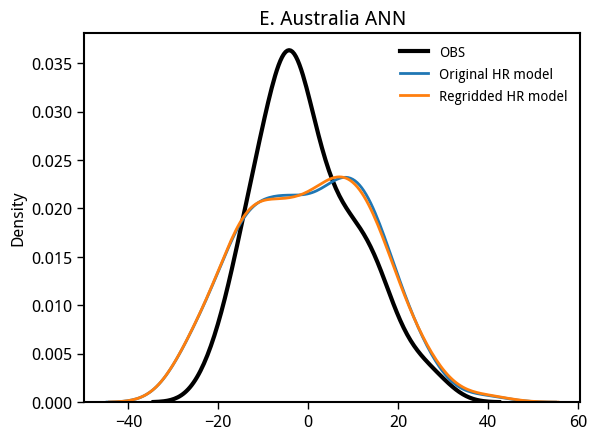

In [48]:
obs_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=region_index).sel(model = 'obs'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
regrid_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=41).sel(model = 'CanESM5'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
# regrid_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=41).sel(model = 'HadGEM3-GC31-MM'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
# regrid_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=region_index).sel(model = 'CNRM-CM6-1-HR'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
orig_dist = detrend_separate_check(reorder(calc_anom(precip_region_mean)).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))

sns.kdeplot(obs_dist, color='k', lw=3.0, label = 'OBS')
sns.kdeplot(orig_dist, lw=2.0, label='Original HR model')
sns.kdeplot(regrid_dist, lw=2.0, label = 'Regridded HR model')
plt.title('E. Australia ANN')
plt.legend(frameon=False, fontsize=10)

In [73]:
orig_dists = np.empty((len(out.isel(region=slice(0,-2)).region), len(obs_dist)))
regr_dists = np.empty((len(out.isel(region=slice(0,-2)).region), len(obs_dist)))
obs_dists = np.empty((len(out.isel(region=slice(0,-2)).region), len(obs_dist)))
for i in range(len(out.isel(region=slice(0,-2)).region)):
    # precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1-HR/historical/r1i1p1f2/Amon/pr/gr/v20191021/*.nc')
    # precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/historical/r1i1p1f3/Amon/pr/gn/v20191207/*.nc')
    precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')
    ar6_mask = regionmask.defined_regions.ar6.land.mask_3D(precip_land, wrap_lon=False, drop=False)
    precip_region = precip_land.where(ar6_mask.isel(region=i))
    weights = np.cos(np.deg2rad(precip_region.lat))
    weights.name = 'weights'
    precip_region_mean = precip_region.weighted(weights).mean(('lat', 'lon'))
    # reorder the vars
    orig_dists[i, :] = detrend_separate_check(reorder(calc_anom(precip_region_mean)).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')).to_numpy()
    obs_dists[i, :] = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=i).sel(model = 'obs'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
    # lr_dists[i, :] = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=i).sel(model = 'CNRM-CM6-1-HR'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
    # regr_dists[i, :] = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=i).sel(model = 'HadGEM3-GC31-MM'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
    regr_dists[i, :] = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=i).sel(model = 'CanESM5'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
    print(f'Completed {i}/44')

Completed 0/44
Completed 1/44
Completed 2/44
Completed 3/44
Completed 4/44
Completed 5/44
Completed 6/44
Completed 7/44
Completed 8/44
Completed 9/44
Completed 10/44
Completed 11/44
Completed 12/44
Completed 13/44
Completed 14/44
Completed 15/44
Completed 16/44
Completed 17/44
Completed 18/44
Completed 19/44
Completed 20/44
Completed 21/44
Completed 22/44
Completed 23/44
Completed 24/44
Completed 25/44
Completed 26/44
Completed 27/44
Completed 28/44
Completed 29/44
Completed 30/44
Completed 31/44
Completed 32/44
Completed 33/44
Completed 34/44
Completed 35/44
Completed 36/44
Completed 37/44
Completed 38/44
Completed 39/44
Completed 40/44
Completed 41/44
Completed 42/44
Completed 43/44


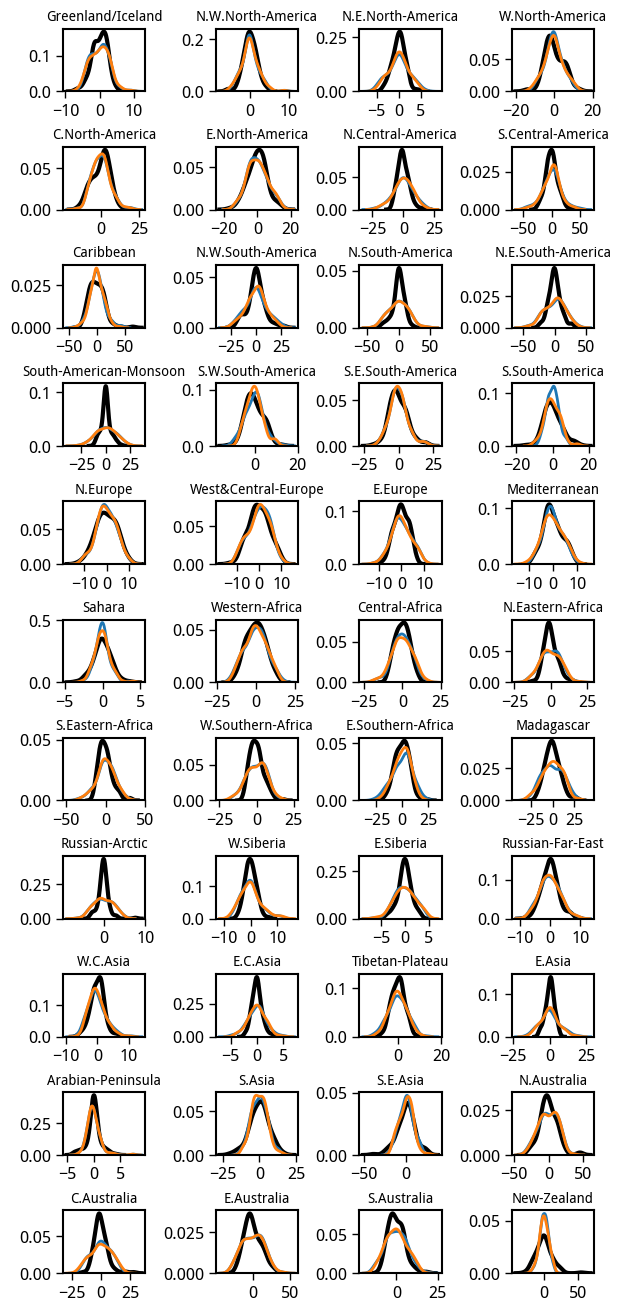

In [74]:
fig, axarr = plt.subplots(nrows=11, ncols=4, figsize=(6, 13), constrained_layout=True, sharey=False)
axlist = axarr.flatten()
for i in range(len(obs_dists)):
    sns.kdeplot(obs_dists[i], color='k', lw=3.0, label = 'OBS', ax=axlist[i])
    sns.kdeplot(orig_dists[i], lw=2.0, label='Original HR model', ax=axlist[i])
    sns.kdeplot(regr_dists[i], lw=2.0, label = 'Regridded HR model', ax=axlist[i])
    axlist[i].set_title(f'{out.isel(region=slice(0,-2)).region.to_numpy()[i]}', fontsize=10)
    axlist[i].set_ylabel('')
    # plt.legend(frameon=False, fontsize=10)
# plt.savefig('./images/review_extra/ann_hr_lr_cnrm_model.png', dpi=300, bbox_inches='tight')
plt.savefig('./images/review_extra/ann_orig_regrid_canesm5_lowres_model.png', dpi=300, bbox_inches='tight')

## ITCZ analysis

In [18]:
import os

In [19]:
model_names = []
for file in sorted(os.listdir('/g/data/ob22/as8561/data/regridded_models/'))[1:-4]:
    if '_pr' in file:
        model_names.append(file.split('_pr')[0])

In [22]:
access_pr = (xr.open_dataset('/g/data/ob22/as8561/data/regridded_models/ACCESS-ESM1-5_pr_r1i1p1f1/pr_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc').pr*86400*30).sel(time = slice('1900', '2014'))
nesm3_pr = (xr.open_dataset('/g/data/ob22/as8561/data/regridded_models/NESM3_pr_r1i1p1f1/pr_Amon_NESM3_historical_r1i1p1f1_gn_185001-201412.nc').pr*86400*30).sel(time = slice('1900', '2014'))
miroc6_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/MIROC6_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
giss_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/GISS-E2-1-H_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
giss_pr2 = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/GISS-E2-1-G-CC_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
iitm_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/IITM-ESM_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
casesm_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/CAS-ESM2-0_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
ukesm_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/UKESM1-0-LL_pr_r1i1p1f2/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
cnrm_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/CNRM-ESM2-1_pr_r1i1p1f2/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
hadgem_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/HadGEM3-GC31-MM_pr_r1i1p1f3/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
awi_esm_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/AWI-ESM-1-1-LR_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()

In [23]:
rean_pr = (xr.open_mfdataset('./data/regridded/20CR/prate.mon.mean_regrid.nc').prate*86400*30).sel(time = slice('1900', '2014')).load()

In [28]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [29]:
obs = rean_pr.sel(lat=slice(-15, 15), lon = slice(-150+360, -90+360)).mean(('time', 'lon'))
pred = nesm3_pr.sel(lat=slice(-15, 15), lon = slice(-150+360, -90+360)).mean(('time', 'lon'))
pred_alt = miroc6_pr.sel(lat=slice(-15, 15), lon = slice(-150+360, -90+360)).mean(('time', 'lon'))
pred_alt2 = giss_pr2.sel(lat=slice(-15, 15), lon = slice(-150+360, -90+360)).mean(('time', 'lon'))

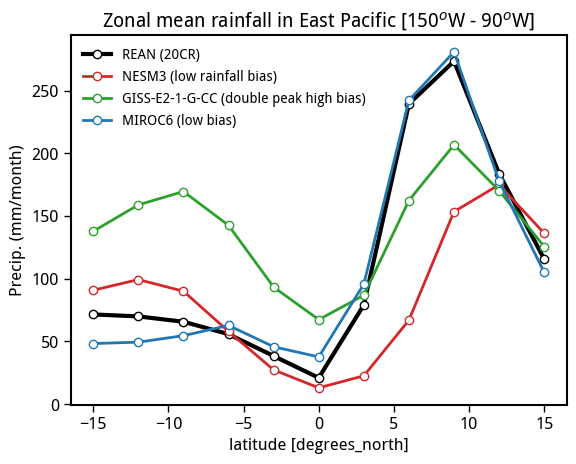

In [30]:
obs.plot(color='k', lw=3.0, marker='o', mfc='white', label='REAN (20CR)')
pred.plot(color='tab:red', lw=2.0, marker='o', mfc='white', label='NESM3 (low rainfall bias)')
pred_alt2.plot(color='tab:green', lw=2.0, marker='o', mfc='white', label='GISS-E2-1-G-CC (double peak high bias)')
pred_alt.plot(color='tab:blue', lw=2.0, marker='o', mfc='white', label='MIROC6 (low bias)')
plt.ylabel('Precip. (mm/month)')
plt.title('Zonal mean rainfall in East Pacific [150$^{o}$W - 90$^{o}$W]', fontsize=14)
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/double_itcz_bias_method.png', dpi=300, bbox_inches='tight')

In [31]:
rean_nino_index = raw.nino.isel(model=-1, region=0).drop(('model', 'region'))
thresh = float(rean_nino_index.std('time'))
rean_pr['time'] = rean_nino_index['time']

In [32]:
import matplotlib.ticker as mticker

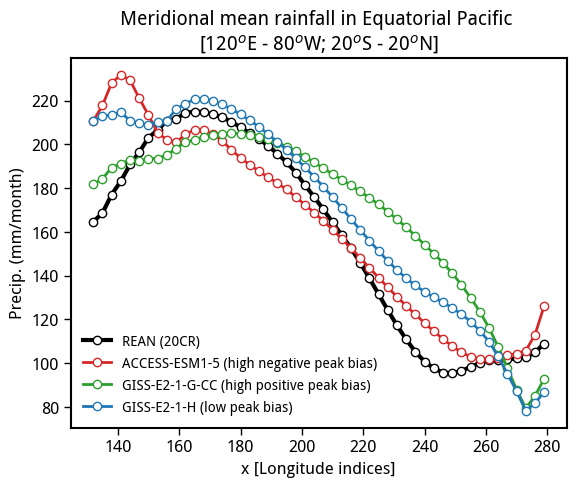

In [33]:
rean_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='k', lw=3.0, marker='o', mfc='white', label='REAN (20CR)')
access_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='tab:red', lw=2.0, marker='o', mfc='white', label='ACCESS-ESM1-5 (high negative peak bias)')
giss_pr2.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='tab:green', lw=2.0, marker='o', mfc='white', label='GISS-E2-1-G-CC (high positive peak bias)')
giss_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='tab:blue', lw=2.0, marker='o', mfc='white', label='GISS-E2-1-H (low peak bias)')
# iitm_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='tab:green', lw=2.0, marker='o', mfc='white', label='IITM-ESM (low bias)')
# awi_esm_pr.sel(lat = slice(-20, 20), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='tab:green', lw=2.0, marker='o', mfc='white', label='AWI-ESM-1-1-LR (high bias)')
plt.ylabel('Precip. (mm/month)')
plt.xlabel('x [Longitude indices]')
plt.title('Meridional mean rainfall in Equatorial Pacific \n[120$^{o}$E - 80$^{o}$W; 20$^{o}$S - 20$^{o}$N]', fontsize=14)
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/long_peak_method.png', dpi=300, bbox_inches='tight')

In [34]:
summ_trop_rain = rean_pr.sel(lat = slice(-20, 20)).groupby('time.season').mean('time').sel(season='JJA')
wint_trop_rain = rean_pr.sel(lat = slice(-20, 20)).groupby('time.season').mean('time').sel(season='DJF')

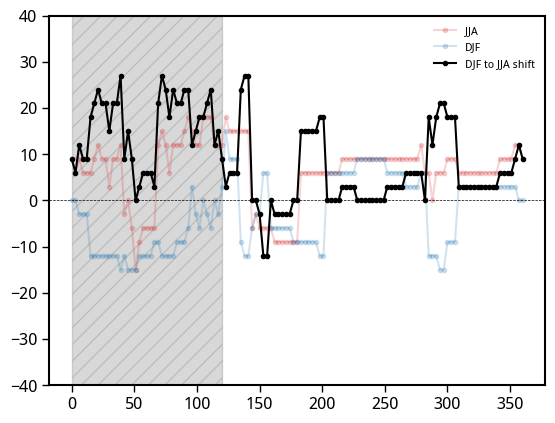

In [35]:
plt.plot(summ_trop_rain.lon, summ_trop_rain.lat.where(summ_trop_rain == summ_trop_rain.max('lat')).mean('lat'), marker='.', color='tab:red', alpha=0.2, label='JJA')
plt.plot(wint_trop_rain.lon, wint_trop_rain.lat.where(wint_trop_rain == wint_trop_rain.max('lat')).mean('lat'), marker='.', color='tab:blue', alpha=0.2, label='DJF')
test_itcz_shift = summ_trop_rain.lat.where(summ_trop_rain == summ_trop_rain.max('lat')).mean('lat') - wint_trop_rain.lat.where(wint_trop_rain == wint_trop_rain.max('lat')).mean('lat')
plt.plot(summ_trop_rain.lon, test_itcz_shift, marker='.', color='k', label='DJF to JJA shift')
plt.axvspan(0, 120, color='gray', alpha=0.3, hatch='//')
plt.axhline(0.0, color='k', ls='--', lw = 0.5)
plt.ylim(-40, 40)
plt.legend(frameon=False, fontsize=8)

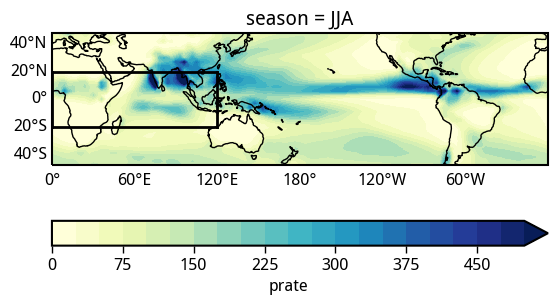

In [36]:
# plt.figure(figsize=(10,6))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=180))
gl = ax.gridlines(draw_labels=True, alpha=0.)
gl.top_labels=False
gl.right_labels=False
rean_pr.sel(lat = slice(-50, 50)).groupby('time.season').mean('time').sel(season='JJA').plot.contourf(cmap = 'YlGnBu', levels=21, vmin=0, vmax=500, transform=ccrs.PlateCarree(), cbar_kwargs=dict(orientation='horizontal'))
ax.plot([0, 120], [-20, -20], transform=ccrs.PlateCarree(), color='k', lw=2.0)
ax.plot([0, 120], [20, 20], transform=ccrs.PlateCarree(), color='k', lw=2.0)
ax.plot([0, 0], [-20, 20], transform=ccrs.PlateCarree(), color='k', lw=2.0)
ax.plot([120, 120], [-20, 20], transform=ccrs.PlateCarree(), color='k', lw=2.0)
ax.coastlines()

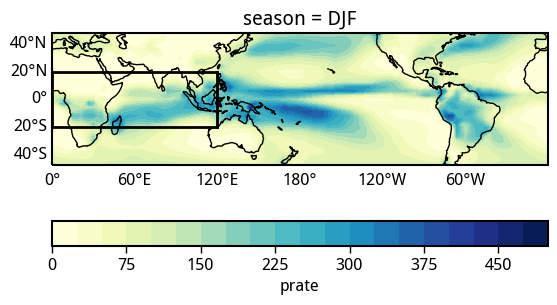

In [37]:
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=180))
rean_pr.sel(lat = slice(-50, 50)).groupby('time.season').mean('time').sel(season='DJF').plot.contourf(cmap = 'YlGnBu', levels=21, vmin=0, vmax=500, transform=ccrs.PlateCarree(), cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=0.)
gl.top_labels=False
gl.right_labels=False
ax.plot([0, 120], [-20, -20], transform=ccrs.PlateCarree(), color='k', lw=2.0)
ax.plot([0, 120], [20, 20], transform=ccrs.PlateCarree(), color='k', lw=2.0)
ax.plot([0, 0], [-20, 20], transform=ccrs.PlateCarree(), color='k', lw=2.0)
ax.plot([120, 120], [-20, 20], transform=ccrs.PlateCarree(), color='k', lw=2.0)
ax.coastlines()

In [38]:
summ_etrop_rain = rean_pr.sel(lat = slice(-20, 20), lon = slice(0, 120)).groupby('time.season').mean('time').sel(season='JJA')
wint_etrop_rain = rean_pr.sel(lat = slice(-20, 20), lon = slice(0, 120)).groupby('time.season').mean('time').sel(season='DJF')

In [39]:
obs_summ_loc = float(summ_trop_rain.lat.where(summ_trop_rain == summ_trop_rain.max('lat')).mean('lat').mean('lon'))
obs_wint_loc = float(wint_trop_rain.lat.where(wint_trop_rain == wint_trop_rain.max('lat')).mean('lat').mean('lon'))
obs_summ_loc_eh = float(summ_etrop_rain.lat.where(summ_etrop_rain == summ_etrop_rain.max('lat')).mean('lat').mean('lon'))
obs_wint_loc_eh = float(wint_etrop_rain.lat.where(wint_etrop_rain == wint_etrop_rain.max('lat')).mean('lat').mean('lon'))
# obs_itcz_seasonal_shift = float(summ_trop_rain.lat.where(summ_trop_rain == summ_trop_rain.max('lat')).mean('lat').mean('lon') - wint_trop_rain.lat.where(wint_trop_rain == wint_trop_rain.max('lat')).mean('lat').mean('lon'))
# obs_itcz_seasonal_shift_eh = float(summ_etrop_rain.lat.where(summ_etrop_rain == summ_etrop_rain.max('lat')).mean('lat').mean('lon') - wint_etrop_rain.lat.where(wint_etrop_rain == wint_etrop_rain.max('lat')).mean('lat').mean('lon'))
obs_summ_loc, obs_summ_loc_eh, obs_wint_loc, obs_wint_loc_eh

(6.371900826446281, 7.317073170731708, -2.677685950413223, -8.268292682926829)

In [40]:
# test = rean_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon')
test = access_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon')
float(test.where(test == test.max(), drop=True).lon)

141.0

In [41]:
# test.where(test == test.max(), drop=True)
test

<xarray.DataArray 'pr' (lon: 54)>
array([         nan,          nan,          nan,          nan,
       210.71285575, 217.83141187, 228.16371988, 231.79393259,
       229.31620915, 221.05260579, 213.35949189, 205.28987318,
       202.07661979, 200.92669967, 204.56385205, 206.6448997 ,
       206.62334072, 204.6903526 , 201.57203294, 197.60719727,
       193.82161635, 190.71259535, 187.72659499, 184.99816688,
       182.30195263, 179.41701204, 175.93544699, 172.46359209,
       168.81461258, 165.04250188, 161.05408286, 156.93191419,
       152.6820085 , 148.19166931, 143.61410727, 139.11893859,
       134.67984213, 130.35284801, 126.23291106, 122.27122992,
       118.36006354, 114.62663336, 111.068709  , 107.76666712,
       104.97796078, 102.89960027, 101.83444058, 102.06401038,
       102.56717362, 103.59193396, 104.41780878, 105.68282517,
       112.99458814, 126.22399012])
Coordinates:
  * lon      (lon) float64 120.0 123.0 126.0 129.0 ... 270.0 273.0 276.0 279.0

In [42]:
obs1 = rean_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon')
pred1 = access_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon')

In [43]:
rmse(pred, obs)

<xarray.DataArray ()>
array(67.302053)

In [44]:
pred_peak = float(pred1.where(pred1 == pred1.max(), drop=True).lon) 
obs_peak = float(obs1.where(obs1 == obs1.max(), drop=True).lon)
peak_bias = pred_peak - obs_peak
peak_bias

-24.0

In [45]:
obs_peak, pred_peak

(165.0, 141.0)

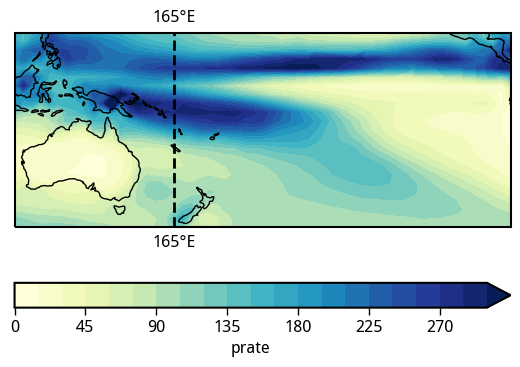

In [46]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
rean_pr.sel(lat = slice(-50, 20), lon = slice(110, -80+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmin=0, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=1., color='k', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([168])
gl.xlocator = mticker.FixedLocator([obs_peak])
gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

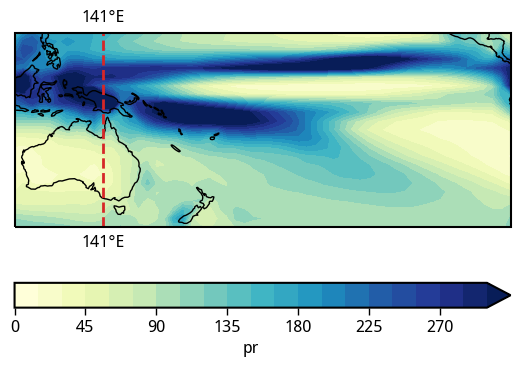

In [53]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
access_pr.sel(lat = slice(-50, 20), lon = slice(110, -80+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmin=0, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=1., color='tab:red', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([141])
gl.xlocator = mticker.FixedLocator([pred_peak])
gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

In [380]:
metric = []
metric1 = []
metric2_summ = []
metric2_wint = []
metric3_summ = []
metric3_wint = []
i = 1
for model in model_names:
    model_pr = (xr.open_mfdataset(f'/g/data/ob22/as8561/data/regridded_models/{model}_pr_*/*.nc').pr*86400*30).load()
    #
    summ_trop_rain = model_pr.sel(lat = slice(-20, 20)).groupby('time.season').mean('time').sel(season='JJA')
    wint_trop_rain = model_pr.sel(lat = slice(-20, 20)).groupby('time.season').mean('time').sel(season='DJF')
    summ_etrop_rain = model_pr.sel(lat = slice(-20, 20), lon = slice(0, 120)).groupby('time.season').mean('time').sel(season='JJA')
    wint_etrop_rain = model_pr.sel(lat = slice(-20, 20), lon = slice(0, 120)).groupby('time.season').mean('time').sel(season='DJF')
    model_summ_loc = float(summ_trop_rain.lat.where(summ_trop_rain == summ_trop_rain.max('lat')).mean('lat').mean('lon'))
    model_wint_loc = float(wint_trop_rain.lat.where(wint_trop_rain == wint_trop_rain.max('lat')).mean('lat').mean('lon'))
    model_summ_loc_eh = float(summ_etrop_rain.lat.where(summ_etrop_rain == summ_etrop_rain.max('lat')).mean('lat').mean('lon'))
    model_wint_loc_eh = float(wint_etrop_rain.lat.where(wint_etrop_rain == wint_etrop_rain.max('lat')).mean('lat').mean('lon'))
    #
    pred = model_pr.sel(time = slice('1900', '2014'), lat=slice(-15, 15), lon = slice(-150+360, -90+360)).mean(('time', 'lon'))
    pred1 = model_pr.sel(time = slice('1900', '2014'), lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon')
    pred_peak = float(pred1.where(pred1 == pred1.max(), drop=True).lon) 
    #
    metric.append(float(rmse(pred, obs)))
    metric1.append(float(pred_peak - obs_peak))
    metric2_summ.append(float(model_summ_loc - obs_summ_loc))
    metric2_wint.append(float(model_wint_loc - obs_wint_loc))
    metric3_summ.append(float(model_summ_loc_eh - obs_summ_loc_eh))
    metric3_wint.append(float(model_wint_loc_eh - obs_wint_loc_eh))
    print(f'Completed {i}/{len(model_names)}', end='\r')
    i += 1

In [381]:
metric1

[-24.0,
 -24.0,
 -27.0,
 -33.0,
 -30.0,
 -27.0,
 0.0,
 -33.0,
 3.0,
 -15.0,
 -18.0,
 -15.0,
 -18.0,
 -18.0,
 -24.0,
 -3.0,
 0.0,
 0.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 -18.0,
 -18.0,
 -18.0,
 6.0,
 -9.0,
 -21.0,
 -9.0,
 -9.0,
 12.0,
 9.0,
 3.0,
 0.0,
 0.0,
 3.0,
 -21.0,
 -33.0,
 -21.0,
 3.0,
 -12.0,
 -3.0,
 -3.0,
 -27.0,
 -3.0,
 -6.0,
 -21.0,
 -15.0,
 3.0,
 -15.0,
 3.0,
 -27.0,
 0.0,
 0.0]

In [29]:
# itcz_metric = pd.DataFrame(dict(model = model_names, double_itcz_bias=metric, long_peak_bias = metric1, \
#                                 summ_itcz_loc_bias = metric2_summ, wint_itcz_loc_bias = metric2_wint, \
#                                 summ_itcz_loc_bias_eh = metric3_summ, wint_itcz_loc_bias_eh = metric3_wint))

In [383]:
# itcz_metric.to_csv('./util/itcz_metric.csv')

In [30]:
itcz_metric = pd.read_csv('./util/itcz_metric.csv').drop(columns=['Unnamed: 0'])

In [31]:
itcz_metric.sort_values('summ_itcz_loc_bias')

model  double_itcz_bias  long_peak_bias  summ_itcz_loc_bias  \
7         CAS-ESM2-0         46.801124           -33.0           -2.578512   
0         ACCESS-CM2         48.725107           -24.0           -2.280992   
15     CNRM-CM6-1-HR         28.368551            -3.0           -2.231405   
39        KACE-1-0-G         52.220231             3.0           -1.933884   
38      IPSL-CM6A-LR         21.884055           -21.0           -1.661157   
17       CNRM-ESM2-1         27.824812             0.0           -1.512397   
20      E3SM-1-1-ECA         46.188842           -27.0           -1.487603   
21          E3SM-1-1         47.603452           -27.0           -1.338843   
48           NorCPM1         49.305893             3.0           -1.314050   
14      CMCC-CM2-SR5         23.630145           -24.0           -1.214876   
26         FGOALS-g3         46.239905            -9.0           -1.066116   
16        CNRM-CM6-1         26.867602             0.0           -0.818182   
37         INM-CM5-0         31.832378           -33.0           -0.768595   
41        MIROC-ES2L         31.276199            -3.0           -0.644628   
19          E3SM-1-0         38.404570           -27.0           -0.396694   
1      ACCESS-ESM1-5         27.310756           -24.0           -0.347107   
24         EC-Earth3         27.265293           -18.0           -0.322314   
32       GISS-E2-1-H         52.443478             3.0           -0.247934   
23     EC-Earth3-Veg         27.415488           -18.0           -0.173554   
22  EC-Earth3-Veg-LR         29.584797           -18.0           -0.173554   
35          IITM-ESM         46.199573             3.0           -0.148760   
36         INM-CM4-8         31.209743           -21.0           -0.024793   
33   HadGEM3-GC31-LL         23.243501             0.0           -0.024793   
8          CESM2-FV2         34.524579             3.0            0.000000   
9    CESM2-WACCM-FV2         42.633001           -15.0            0.024793   
12             CIESM        136.321566           -18.0            0.024793   
52           TaiESM1         26.590179             0.0            0.049587   
13      CMCC-CM2-HR4         45.448955           -18.0            0.049587   
50        NorESM2-MM         25.978688             3.0            0.148760   
49        NorESM2-LM         53.140526           -15.0            0.148760   
51       SAM0-UNICON         30.120884           -27.0            0.173554   
11             CESM2         21.614460           -15.0            0.297521   
27       FIO-ESM-2-0        136.311332           -21.0            0.297521   
53       UKESM1-0-LL         22.585027             0.0            0.347107   
46        MRI-ESM2-0         28.911791           -21.0            0.396694   
10       CESM2-WACCM         24.626792           -18.0            0.396694   
34   HadGEM3-GC31-MM         19.841690             0.0            0.495868   
18           CanESM5         27.886290           -27.0            0.545455   
42            MIROC6         13.316093            -3.0            0.719008   
25       FGOALS-f3-L         27.644808             6.0            0.719008   
2      AWI-CM-1-1-MR         31.988420           -27.0            0.793388   
44     MPI-ESM1-2-HR         38.270783            -3.0            0.818182   
31       GISS-E2-1-G         62.762519             9.0            0.842975   
45     MPI-ESM1-2-LR         38.534181            -6.0            0.991736   
29         GFDL-ESM4         35.688203            -9.0            1.016529   
28          GFDL-CM4         29.222663            -9.0            1.016529   
43   MPI-ESM-1-2-HAM         52.925980           -27.0            1.041322   
4        BCC-CSM2-MR         48.941544           -30.0            1.066116   
30    GISS-E2-1-G-CC         65.003837            12.0            1.190083   
5           BCC-ESM1         57.546690           -27.0            1.289256   
3     AWI-ESM-1-1-LR         40.64876

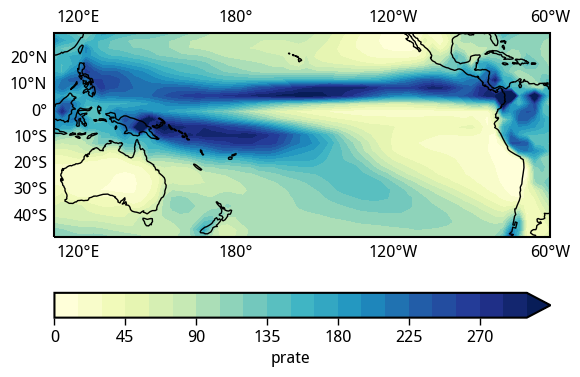

In [44]:
axlist = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
plot_mods = xr.merge([rean_pr, miroc6_pr, nesm3_pr, giss_pr2])
rean_pr.sel(lat = slice(-50, 30), lon = slice(110, -60+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmin=0, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=0., color='tab:red', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([141])
# gl.xlocator = mticker.FixedLocator([pred_peak])
# gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

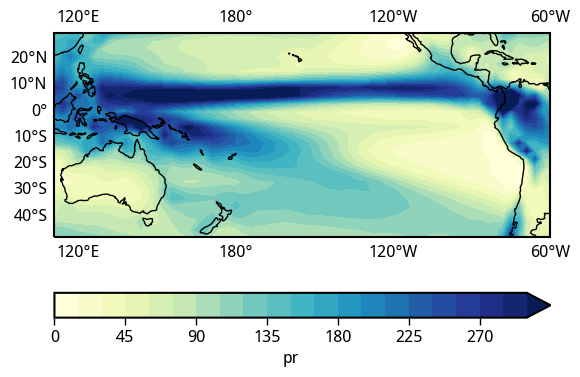

In [45]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
miroc6_pr.sel(lat = slice(-50, 30), lon = slice(110, -60+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmin=0, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=0., color='tab:red', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([141])
# gl.xlocator = mticker.FixedLocator([pred_peak])
# gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

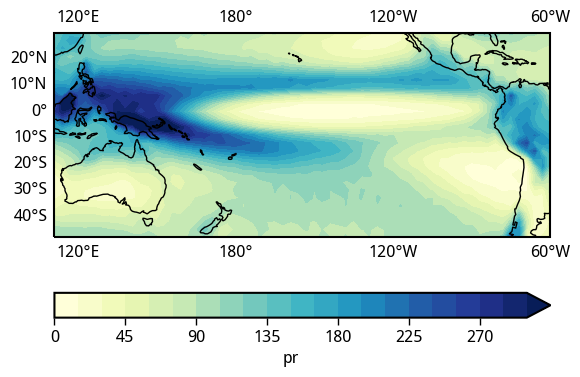

In [46]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
nesm3_pr.sel(lat = slice(-50, 30), lon = slice(110, -60+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmin=0, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=0., color='tab:red', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([141])
# gl.xlocator = mticker.FixedLocator([pred_peak])
# gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

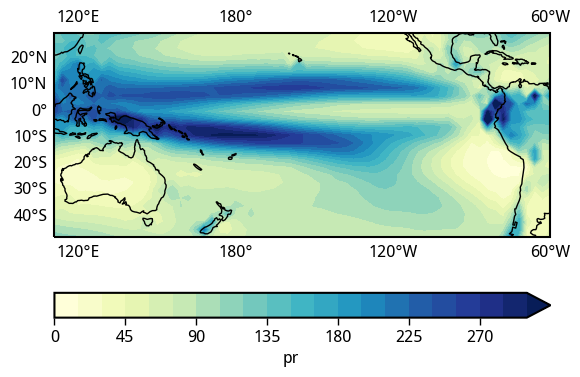

In [47]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
giss_pr2.sel(lat = slice(-50, 30), lon = slice(110, -60+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmin=0, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=0., color='tab:red', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([141])
# gl.xlocator = mticker.FixedLocator([pred_peak])
# gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

<AxesSubplot:ylabel='Density'>

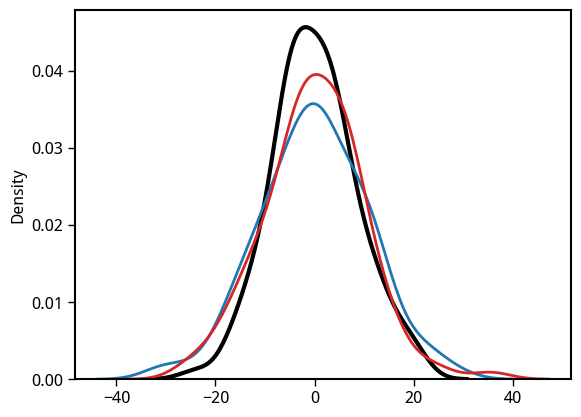

In [99]:
sns.kdeplot(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'rean'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')), color='k', lw=3.0)
sns.kdeplot(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'MIROC6'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')), color='tab:blue', lw=2.0)
sns.kdeplot(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'GISS-E2-1-G-CC'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')), color='tab:red', lw=2.0)

In [48]:
stats.kurtosis(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'rean'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))), stats.kurtosis(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'MIROC6'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))), stats.kurtosis(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'GISS-E2-1-G-CC'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')))

(0.061131854499740346, 0.16682881300521668, 0.8377980959761353)

In [63]:
asymm_bias_df = (out.isel(region=39, season=0, model=slice(0, -2)).asymm - out.isel(region=39, season=0, model=-2).asymm).drop(('region', 'season')).to_dataframe()
skw_bias_df = (skw_res.isel(region=39, season=0, model=slice(0, -2)).pr_skw - skw_res.isel(region=39, season=0, model=-2).pr_skw).drop(('region', 'season')).to_dataframe()

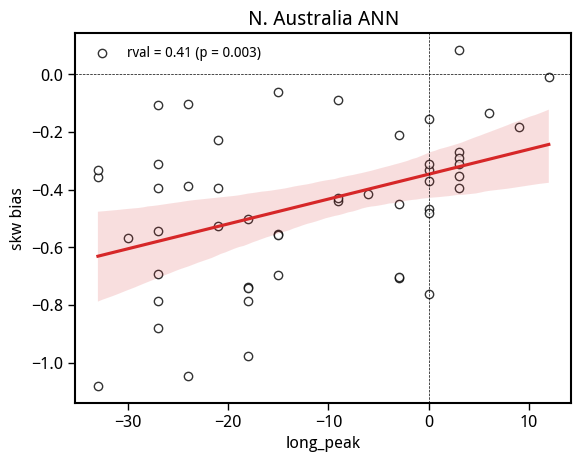

In [64]:
res = stats.spearmanr(itcz_metric.loc[itcz_metric['model'].isin(skw_bias_df.index)].long_peak, skw_bias_df.pr_skw)
sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(skw_bias_df.index)].long_peak, y=skw_bias_df.pr_skw, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('skw bias')
plt.title('N. Australia ANN')
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/long_peak_skw_naus_ann.png', dpi=300, bbox_inches='tight')

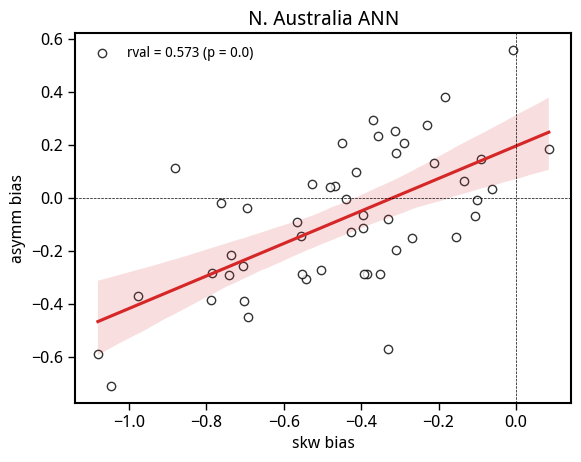

In [65]:
res = stats.spearmanr(skw_bias_df.pr_skw, asymm_bias_df.asymm)
# sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].long_peak, y=asymm_bias_df.asymm, color='k', marker='x')
sns.regplot(x=skw_bias_df.pr_skw, y=asymm_bias_df.asymm, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('asymm bias')
plt.xlabel('skw bias')
plt.title('N. Australia ANN')
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/skw_asymm_naus_ann.png', dpi=300, bbox_inches='tight')

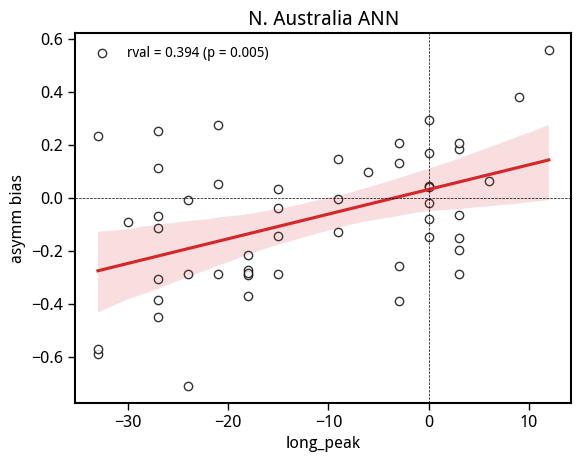

In [66]:
res = stats.spearmanr(itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].long_peak, asymm_bias_df.asymm)
sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].long_peak, y=asymm_bias_df.asymm, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('asymm bias')
plt.title('N. Australia ANN')
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/long_peak_asymm_naus_ann.png', dpi=300, bbox_inches='tight')

In [56]:
out.isel(region=7).region

<xarray.DataArray 'region' ()>
array('S.Central-America', dtype='<U17')
Coordinates:
    region   <U17 'S.Central-America'

In [76]:
asymm_bias_df = (out.isel(region=39, season=0, model=slice(0, -2)).asymm - out.isel(region=39, season=0, model=-2).asymm).drop(('region', 'season')).to_dataframe()
skw_bias_df = (skw_res.isel(region=39, season=0, model=slice(0, -2)).pr_skw - skw_res.isel(region=39, season=0, model=-2).pr_skw).drop(('region', 'season')).to_dataframe()

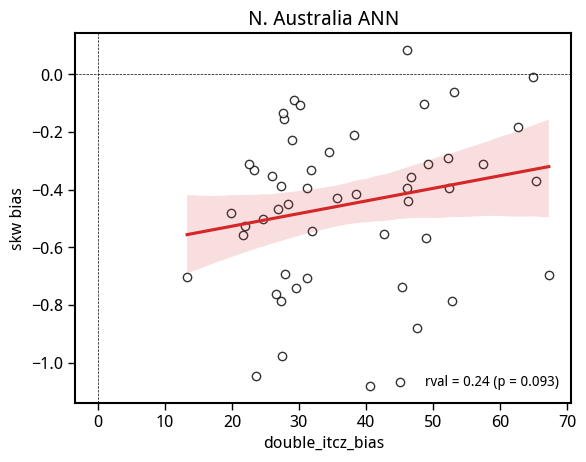

In [80]:
res = stats.spearmanr(itcz_metric.loc[itcz_metric['model'].isin(skw_bias_df.index)].double_itcz_bias, skw_bias_df.pr_skw)
sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(skw_bias_df.index)].double_itcz_bias, y=skw_bias_df.pr_skw, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('skw bias')
plt.title('N. Australia ANN')
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/double_itcz_bias_skw_naus_ann.png', dpi=300, bbox_inches='tight')

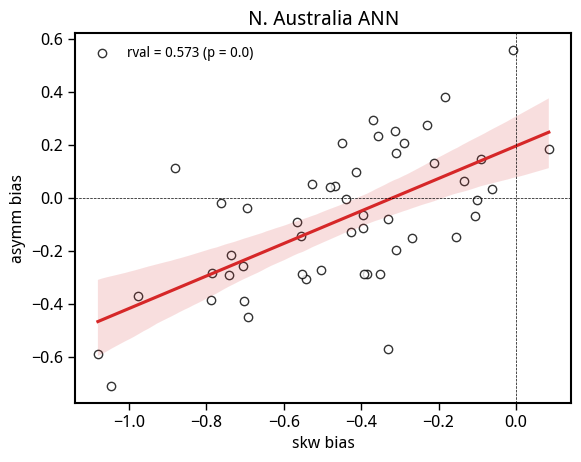

In [81]:
res = stats.spearmanr(skw_bias_df.pr_skw, asymm_bias_df.asymm)
# sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].double_itcz_bias, y=asymm_bias_df.asymm, color='k', marker='x')
sns.regplot(x=skw_bias_df.pr_skw, y=asymm_bias_df.asymm, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('asymm bias')
plt.xlabel('skw bias')
plt.title('N. Australia ANN')
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/skw_asymm_naus_ann.png', dpi=300, bbox_inches='tight')

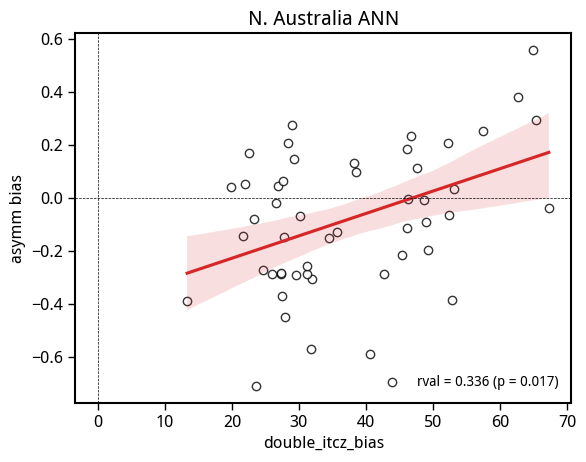

In [82]:
res = stats.spearmanr(itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].double_itcz_bias, asymm_bias_df.asymm)
sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].double_itcz_bias, y=asymm_bias_df.asymm, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('asymm bias')
plt.title('N. Australia ANN')
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/double_itcz_bias_asymm_naus_ann.png', dpi=300, bbox_inches='tight')

In [87]:
asymm_bias_df = (out.isel(region=38, season=3, model=slice(0, -2)).asymm - out.isel(region=38, season=3, model=-2).asymm).drop(('region', 'season')).to_dataframe()
skw_bias_df = (skw_res.isel(region=38, season=3, model=slice(0, -2)).pr_skw - skw_res.isel(region=38, season=3, model=-2).pr_skw).drop(('region', 'season')).to_dataframe()

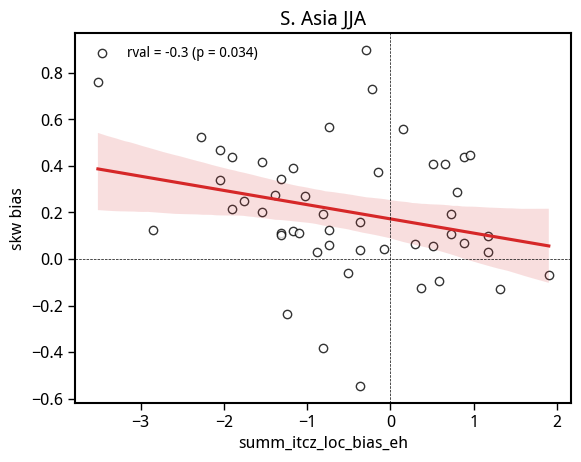

In [90]:
res = stats.spearmanr(itcz_metric.loc[itcz_metric['model'].isin(skw_bias_df.index)].summ_itcz_loc_bias_eh, skw_bias_df.pr_skw)
sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(skw_bias_df.index)].summ_itcz_loc_bias_eh, y=skw_bias_df.pr_skw, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('skw bias')
plt.title('S. Asia JJA')
plt.legend(frameon=False, fontsize=10)
# plt.savefig('./images/review_extra/wint_itcz_loc_bias_eh_eh_skw_naus_ann.png', dpi=300, bbox_inches='tight')

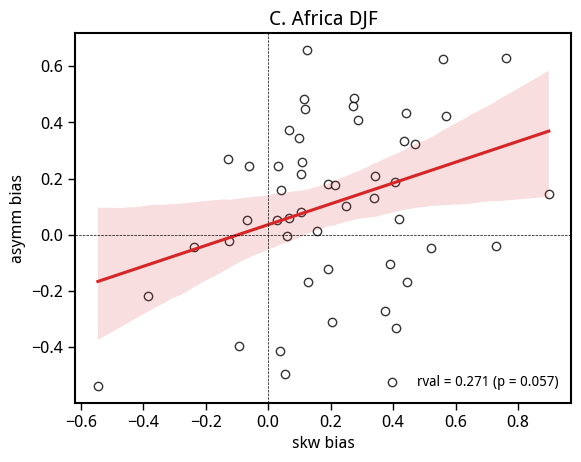

In [91]:
res = stats.spearmanr(skw_bias_df.pr_skw, asymm_bias_df.asymm)
# sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].long_peak, y=asymm_bias_df.asymm, color='k', marker='x')
sns.regplot(x=skw_bias_df.pr_skw, y=asymm_bias_df.asymm, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('asymm bias')
plt.xlabel('skw bias')
plt.title('C. Africa DJF')
plt.legend(frameon=False, fontsize=10)
# plt.savefig('./images/review_extra/skw_asymm_naus_ann.png', dpi=300, bbox_inches='tight')

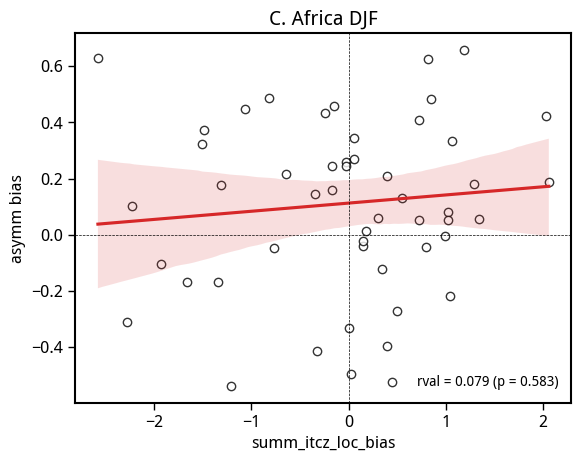

In [92]:
res = stats.spearmanr(itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].summ_itcz_loc_bias, asymm_bias_df.asymm)
sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].summ_itcz_loc_bias, y=asymm_bias_df.asymm, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('asymm bias')
plt.title('C. Africa DJF')
plt.legend(frameon=False, fontsize=10)
# plt.savefig('./images/review_extra/seasonal_shift_bias_asymm_naus_ann.png', dpi=300, bbox_inches='tight')

## Why SON season good performance? [still analysing]

In [20]:
skw_bias = np.abs(skw_res.isel(model = slice(0, -2)) - skw_res.isel(model = -2))
skw_bias

<xarray.Dataset>
Dimensions:  (model: 50, region: 46, season: 5)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * region   (region) object 'Greenland/Iceland' ... 'W.Antarctica'
  * season   (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    pr_skw   (model, region, season) float64 0.9348 0.2129 0.6051 ... nan nan
    n34_skw  (model, region, season) float64 0.03805 0.3134 ... 0.04185 0.3476

<AxesSubplot:xlabel='season'>

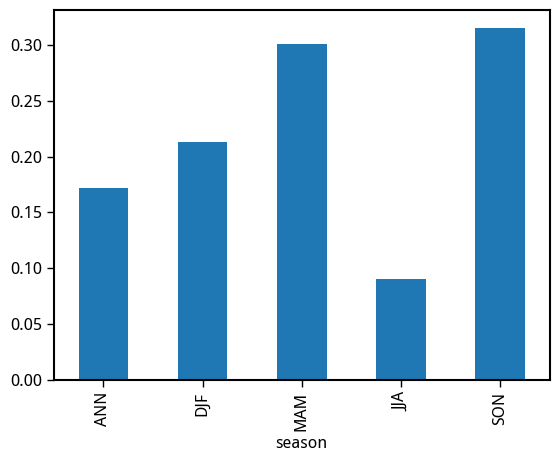

In [21]:
skw_res.n34_skw.isel(model=-2).mean('region').to_series().plot.bar()

<AxesSubplot:xlabel='season', ylabel='model'>

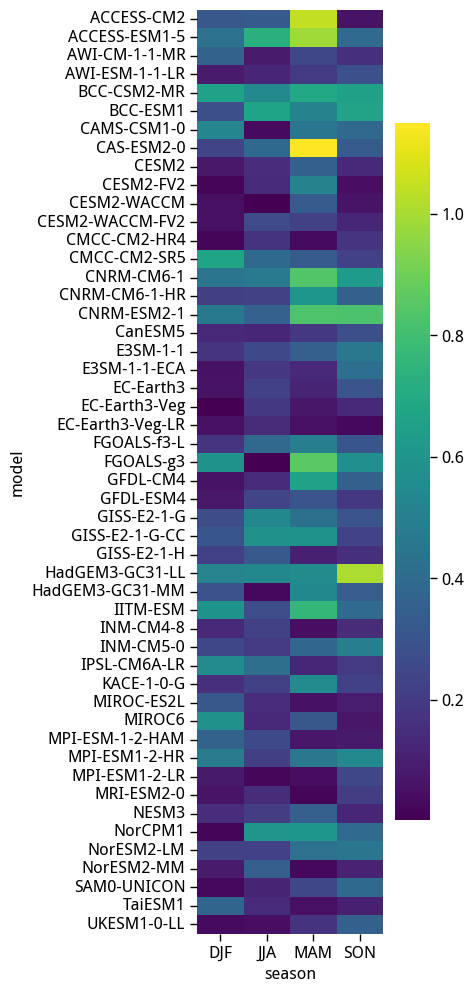

In [88]:
plt.figure(figsize=(3,12))
sns.heatmap(skw_bias.isel(region=slice(0, -2), season=[1, 2, 3, 4]).mean('region').to_dataframe().pivot_table(values='n34_skw', index='model', columns='season'), cmap='viridis')


In [84]:
enc_lnc_bias = np.abs(out[['enc', 'lnc', 'asymm_pval']].isel(model = slice(0, -2)) - out[['enc', 'lnc', 'asymm_pval']].isel(model = -2)).isel(region=slice(0, -2), season=[1,2,3,4])

In [85]:
nino_nina_bias = np.abs(out[['nino', 'nina', 'neut', 'asymm_pval']].isel(model = slice(0, -2)) - out[['nino', 'nina', 'neut', 'asymm_pval']].isel(model = -2)).isel(region=slice(0, -2), season=[1,2,3,4])

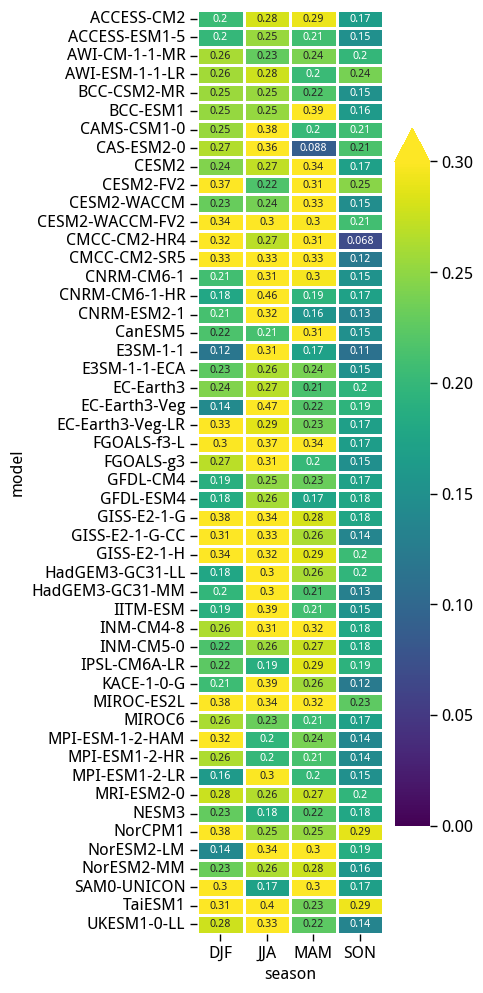

In [96]:
plt.figure(figsize=(3,12))

sns.heatmap(enc_lnc_bias.where(enc_lnc_bias.asymm_pval == 1).mean('region').to_dataframe().pivot_table(values='enc', index='model', columns='season'),\
            cmap='viridis', vmin=0, vmax=0.3, cbar_kws=dict(extend='max'), annot=True, linewidths=2, annot_kws=dict(fontsize=8))

# plt.ylabel('')
# plt.yticks([])

plt.savefig('./images/review_extra/enc_bias_regional_mean.png', dpi=300, bbox_inches='tight')

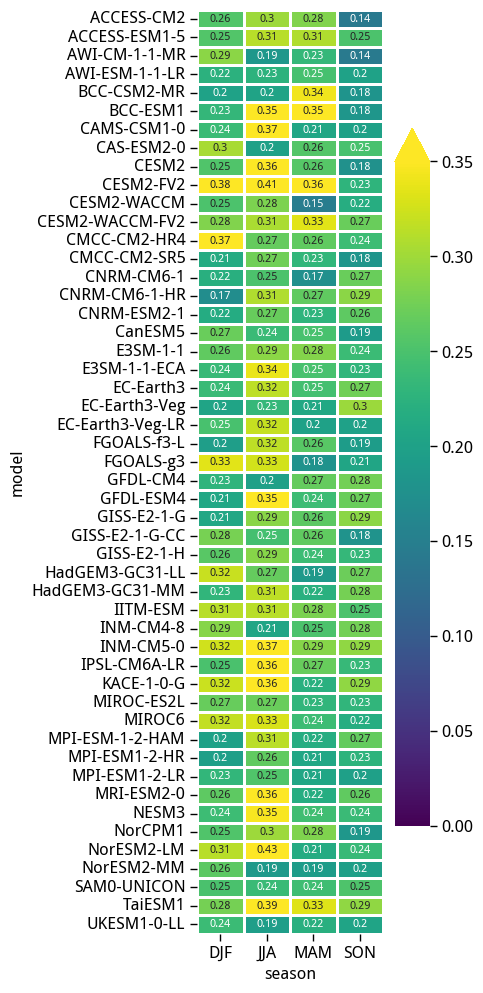

In [101]:
plt.figure(figsize=(3,12))

sns.heatmap(enc_lnc_bias.where(enc_lnc_bias.asymm_pval == 1).mean('region').to_dataframe().pivot_table(values='lnc', index='model', columns='season'),\
            cmap='viridis', vmin=0, vmax=0.35, cbar_kws=dict(extend='max'), annot=True, linewidths=2, annot_kws=dict(fontsize=8))

# plt.ylabel('')
# plt.yticks([])

plt.savefig('./images/review_extra/lnc_bias_regional_mean.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Model outlook')

<Figure size 1000x500 with 0 Axes>

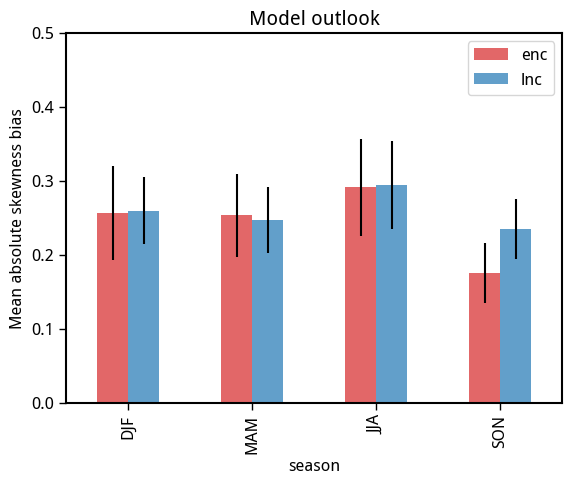

In [109]:
plt.figure(figsize=(10, 5))
val = enc_lnc_bias.where(enc_lnc_bias.asymm_pval == 1).drop(['asymm_pval'])
val.mean(('region', 'model')).to_dataframe().plot(kind = 'bar', color=['tab:red', 'tab:blue', 'gray'], alpha=0.7, yerr = val.mean('region').std('model').to_dataframe().T.values, label=['enc_mean_bias', 'lnc_mean_bias'])
# plt.errorbar(x=val.mean(('region', 'model')).to_dataframe().index, y=val.mean(('region', 'model')).to_dataframe().values, yerr=val.mean('region').std('model').to_dataframe().values, \
#             color='k', elinewidth=2,capthick=2,errorevery=1, alpha=0.9, ms=4, capsize = 5, ls='', label='Model std. dev.')
plt.ylabel('Mean absolute skewness bias')
plt.xlabel('season')
plt.ylim(0, 0.5)
plt.title('Model outlook')
# plt.savefig('./images/review_extra/enc_lnc_bias_model_uncertainty.png', dpi=300, bbox_inches='tight')

(0.0, 0.5)

<Figure size 1000x500 with 0 Axes>

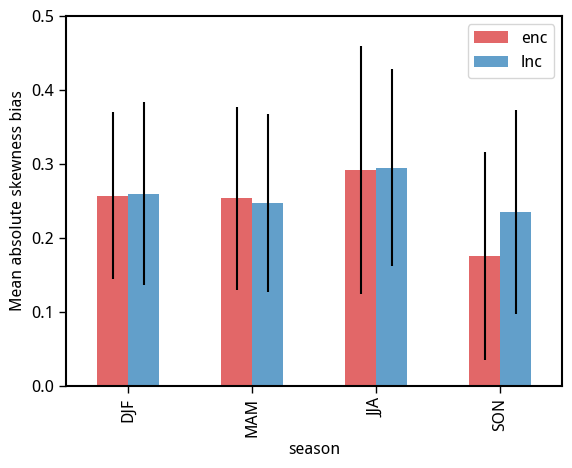

In [108]:
plt.figure(figsize=(10, 5))
val = enc_lnc_bias.where(enc_lnc_bias.asymm_pval == 1).drop(['asymm_pval'])
val.mean(('region', 'model')).to_dataframe().plot(kind = 'bar', color=['tab:red', 'tab:blue', 'gray'], alpha=0.7, yerr = val.mean('model').std('region').to_dataframe().T.values)
# plt.errorbar(x=val.mean(('region', 'model')).to_dataframe().index, y=val.mean(('region', 'model')).to_dataframe().values, yerr=val.mean('region').std('model').to_dataframe().values, \
#             color='k', elinewidth=2,capthick=2,errorevery=1, alpha=0.9, ms=4, capsize = 5, ls='', label='Model std. dev.')
plt.ylabel('Mean absolute skewness bias')
plt.xlabel('season')
plt.ylim(0, 0.5)
# plt.savefig('./images/review_extra/enc_lnc_bias_regional_uncertainty.png', dpi=300, bbox_inches='tight')

## role of internal variability [using large ensembles]

In [36]:
# load data for large ensembles

raw_access = xr.open_dataset('./data/result/raw_access_le.nc')
raw_miroc = xr.open_dataset('./data/result/raw_miroc6_le.nc')
raw_canesm = xr.open_dataset('./data/result/raw_canesm5_le.nc')

out_access = xr.open_dataset('./data/result/out_access_le.nc')
out_miroc = xr.open_dataset('./data/result/out_miroc6_le.nc')
out_canesm = xr.open_dataset('./data/result/out_canesm5_le.nc')

In [37]:
out_access['enc'] = out_access.nino - out_access.neut
out_access['lnc'] = out_access.nina - out_access.neut
out_access['asymm'] = (out_access.enc + out_access.lnc)/2
out_access['symm'] = (out_access.enc - out_access.lnc)/2
out_access['asymm_pval'] = xr.where((out_access.enc_pval > 0.05) & (out_access.lnc_pval > 0.05), 0, 1)

In [38]:
out_miroc['enc'] = out_miroc.nino - out_miroc.neut
out_miroc['lnc'] = out_miroc.nina - out_miroc.neut
out_miroc['asymm'] = (out_miroc.enc + out_miroc.lnc)/2
out_miroc['symm'] = (out_miroc.enc - out_miroc.lnc)/2
out_miroc['asymm_pval'] = xr.where((out_miroc.enc_pval > 0.05) & (out_miroc.lnc_pval > 0.05), 0, 1)

In [39]:
out_canesm['enc'] = out_canesm.nino - out_canesm.neut
out_canesm['lnc'] = out_canesm.nina - out_canesm.neut
out_canesm['asymm'] = (out_canesm.enc + out_canesm.lnc)/2
out_canesm['symm'] = (out_canesm.enc - out_canesm.lnc)/2
out_canesm['asymm_pval'] = xr.where((out_canesm.enc_pval > 0.05) & (out_canesm.lnc_pval > 0.05), 0, 1)

In [40]:
out_canesm = xr.merge([out_canesm.isel(model = slice(0, 21)), out_canesm.isel(model = slice(22, 66))])

In [41]:
p1_index = np.array([x for x in out_canesm.model.to_numpy() if 'p1' in x])
p2_index = np.array([x for x in out_canesm.model.to_numpy() if 'p2' in x])

out_canesmp2 = out_canesm.where(out_canesm.model.isin(p2_index), drop=True)
out_canesmp1 = out_canesm.where(out_canesm.model.isin(p1_index), drop=True)
# out_canesm[out_canesm.model[1::2].to_numpy()]
# out_canesm.model[1::2].to_numpy()
out_canesmp1

<xarray.Dataset>
Dimensions:      (model: 25, region: 46, season: 5)
Coordinates:
  * model        (model) object 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
  * region       (region) object 'Greenland/Iceland' ... 'W.Antarctica'
  * season       (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables: (12/20)
    std_dev      (model, region, season) float64 3.66 7.649 7.707 ... 7.141 7.71
    clim         (model, region, season) float64 29.78 19.81 ... 31.82 28.63
    pr_skw       (model, region, season) float64 0.1769 0.3897 ... -0.08417
    n34_skw      (model, region, season) float64 0.1904 0.06143 ... 0.09566
    corr_coef    (model, region, season) float64 0.0839 -0.1385 ... 0.05591
    pval         (model, region, season) float64 0.3706 0.1398 ... 0.5529
    ...           ...
    threshold    (model) float64 0.743 0.6904 0.7289 ... 0.7433 0.6973 0.6968
    enc          (model, region, season) float64 0.2445 -0.4117 ... 0.1672
    lnc          (model, region, season) float64 -0.213 -0.1176 ... -0.005635
    asymm        (model, region, season) float64 0.01576 -0.2646 ... 0.08077
    symm         (model, region, season) float64 0.2287 -0.1471 ... 0.0864
    asymm_pval   (model, region, season) float64 0.0 1.0 0.0 1.0 ... 0.0 1.0 0.0

Text(0, 0.5, 'N34 skewness \n[$^{o}$C]')

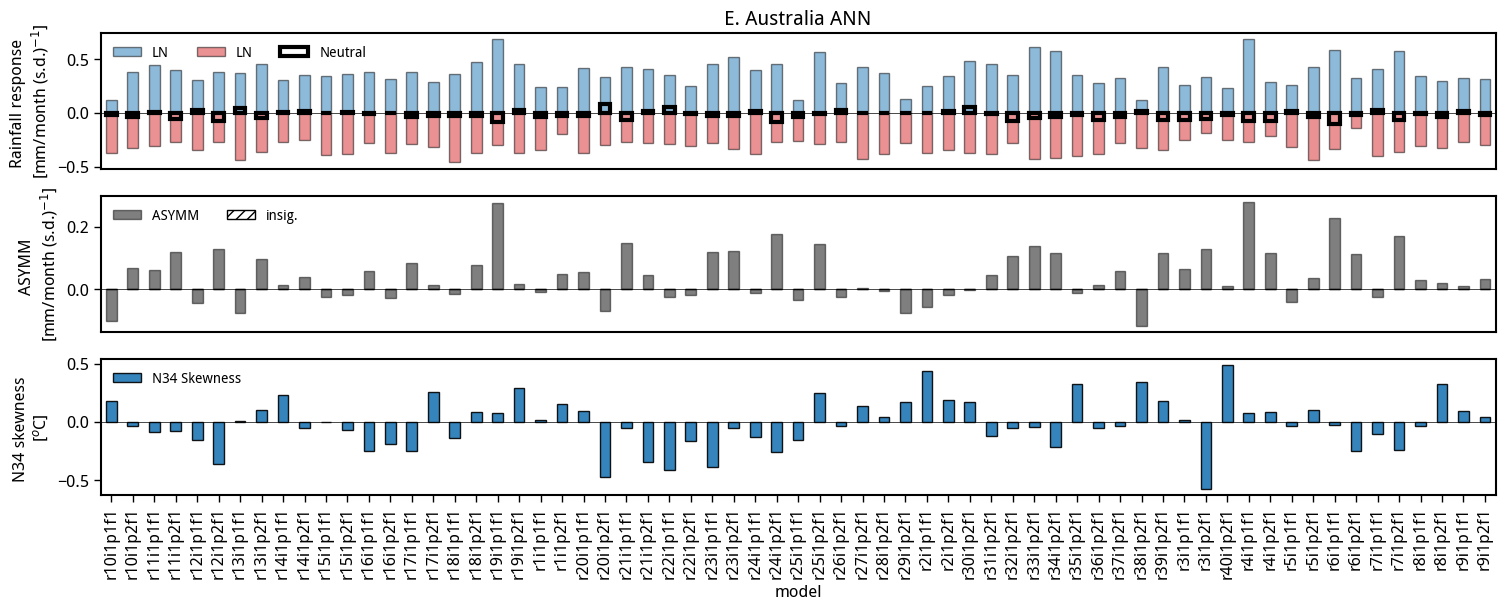

In [146]:
plt.figure(figsize=(18,6))

plt.subplot(311)
plt.axhline(0.0, color='k', lw=0.5)
out_canesm.isel(season=4, region=39).nina.to_series().plot.bar(color='tab:blue', lw=1, edgecolor='k', alpha=0.5, label='LN')
out_canesm.isel(season=4, region=39).nino.to_series().plot.bar(color='tab:red', lw=1, edgecolor='k', alpha=0.5, label='LN')
out_canesm.isel(season=4, region=39).neut.to_series().plot.bar(color='#FF000000', lw=3, edgecolor='k', label='Neutral')
plt.legend(frameon=False, fontsize=10, ncol=3)
plt.title('E. Australia ANN')
plt.xticks([])
plt.xlabel('')
plt.ylabel('Rainfall response \n[mm/month (s.d.)$^{-1}$]')

plt.subplot(312)
plt.axhline(0.0, color='k', lw=0.5)
out_canesm.isel(season=4, region=39).asymm.to_series().plot.bar(color='k', lw=1, edgecolor='k', alpha=0.5, label='ASYMM')
(out_canesm.isel(season=4, region=39).asymm.where(out_canesm.isel(season=4, region=39).asymm_pval == 0)).to_series().plot.bar(color='#FF000000', hatch='///', lw=1, edgecolor='k', label='insig.')
plt.legend(frameon=False, fontsize=10, ncol=3)
plt.xticks([])
plt.xlabel('')
# plt.title('E. Auastralia ANN')
plt.ylabel('ASYMM \n[mm/month (s.d.)$^{-1}$]')


plt.subplot(313)
plt.axhline(0.0, color='k', lw=0.5)
out_canesm.isel(season=4, region=39).n34_skw.to_series().plot.bar(color='tab:blue', lw=1, edgecolor='k', alpha=0.9, label='N34 Skewness')
# (out_canesm.isel(season=4, region=39).asymm.where(out_canesm.isel(season=4, region=39).asymm_pval == 0)).to_series().plot.bar(color='#FF000000', hatch='///', lw=1, edgecolor='k', label='insig.')
plt.legend(frameon=False, fontsize=10, ncol=3)
# plt.title('E. Auastralia ANN')
plt.ylabel('N34 skewness \n[$^{o}$C]')

In [118]:
# plt.figure(figsize=(18,5))

# plt.subplot(211)
# plt.axhline(0.0, color='k', lw=0.5)
# out_access.isel(season=3, region=41).nina.to_series().plot.bar(color='tab:blue', lw=1, edgecolor='k', alpha=0.5, label='LN')
# out_access.isel(season=3, region=41).nino.to_series().plot.bar(color='tab:red', lw=1, edgecolor='k', alpha=0.5, label='LN')
# out_access.isel(season=3, region=41).neut.to_series().plot.bar(color='#FF000000', lw=3, edgecolor='k', label='Neutral')
# plt.legend(frameon=False, fontsize=10, ncol=3)
# plt.title('E. Australia SON')
# plt.xticks([])
# plt.xlabel('')
# plt.ylabel('Rainfall response \n[mm/month (s.d.)$^{-1}$]')

# plt.subplot(212)
# plt.axhline(0.0, color='k', lw=0.5)
# out_access.isel(season=3, region=41).asymm.to_series().plot.bar(color='k', lw=1, edgecolor='k', alpha=0.5, label='ASYMM')
# (out_access.isel(season=3, region=41).asymm.where(out_access.isel(season=3, region=41).asymm_pval == 0)).to_series().plot.bar(color='#FF000000', hatch='///', lw=1, edgecolor='k', label='insig.')
# plt.legend(frameon=False, fontsize=10, ncol=3)
# # plt.title('E. Auastralia SON')
# plt.ylabel('ASYMM \n[mm/month (s.d.)$^{-1}$]')

In [103]:
# plotting code
import matplotlib as m
from matplotlib.colors import BoundaryNorm as BM


def plot_background(ax):
    ax.add_feature(cfeature.COASTLINE, alpha=0.9, lw=1.1)
    ax.set_global()
    # ax.add_feature(cfeature.LAND, color='lightgray')
    # ax.add_feature(cfeature.OCEAN, color='lightgray')
    gl = ax.gridlines(draw_labels=True,
                      linewidth=1, color='gray', alpha=0.01, linestyle='--')
    gl.top_labels = False
    # gl.left_labels = False
    # gl.bottom_labels = False
    gl.right_labels = False
    gl.xlines = False
    # gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}
    return ax

# plotting function for the case of general pval
def plot(z, titles, labels, cmap, vmin, vmax, extend='both', cbar_shrink=0.4, cbar_aspect=25, cbar_pad=0.05, cbar_label='Precip', pval = [], \
         nrows=1, ncols=3, figsize=(12,4), ocean_mask_list=[], mme_index_list=[]):
    cmap.set_bad('white',1.)
    pg = regionmask.defined_regions.ar6.land.polygons
    fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True, subplot_kw={'projection':ccrs.Robinson(central_longitude=0)})
    
    axlist = axarr.flatten()
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    for i in range(len(z)):
        min_val, max_val = min(z[i]), max(z[i])
        # colors = cmap(plt.Normalize(min_val, max_val)(z[i]))
        colors = cmap(plt.Normalize(vmin, vmax)(z[i]))
        
        for j in range(len(z[i])):
            # if pval != [] and pval_mme == []:
            if pval != []:
                if i not in mme_index_list:
                    if pval[i][j] > 0.05:
                        axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='/////')
                    else:
                        axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='')
                else:
                    if pval[i][j] < 0.52:
                        axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='/////')
                    else:
                        axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='')
            else:
                axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='')
        axlist[i].set_title(titles[i], loc='center', y=1.05)
        axlist[i].text(0.1, 1.05, labels[i], size=16, fontweight='bold', transform=axlist[i].transAxes)
        if i in ocean_mask_list:
            axlist[i].add_feature(cfeature.OCEAN, color = 'white', zorder=1)
            
    for ax in axlist:
        plot_background(ax)
        
    plt.colorbar(m.cm.ScalarMappable(norm = norm, cmap=cmap), extend=extend, ax = axlist, \
                orientation = 'vertical', shrink=cbar_shrink, aspect = cbar_aspect, pad = cbar_pad, label = cbar_label)


# plotting function for the case of enc and lnc pval
def plot2(z, titles, labels, cmap, vmin, vmax, extend='both', cbar_shrink=0.4, cbar_aspect=25, cbar_pad=0.05, cbar_label = 'Precip', pval1 = [], pval2=[], \
          nrows=1, ncols=3, figsize=(12,4), ocean_mask_list=[], mme_index_list=[]):
    cmap.set_bad('white',1.)
    pg = regionmask.defined_regions.ar6.land.polygons
    fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True, subplot_kw={'projection':ccrs.Robinson(central_longitude=0)})
    
    axlist = axarr.flatten()
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    for i in range(len(z)):
        min_val, max_val = min(z[i]), max(z[i])
        # colors = cmap(plt.Normalize(min_val, max_val)(z[i]))
        colors = cmap(plt.Normalize(vmin, vmax)(z[i]))
        
        # change w.r.t main plot fuunction is here
        for j in range(len(z[i])):
            # if pval != [] and pval_mme == []:
            if pval1 != [] or pval2 != []:
                if i not in mme_index_list:
                    if pval1[i][j] > 0.05 and pval2[i][j] > 0.05:
                        axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='/////')
                    else:
                        axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='')
                else:
                    if pval1[i][j] < 0.52 and pval2[i][j] < 0.52:
                        axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='/////')
                    else:
                        axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='')
            else:
                axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='')
        axlist[i].set_title(titles[i], loc='center', y=1.05)
        axlist[i].text(0.1, 1.05, labels[i], size=16, fontweight='bold', transform=axlist[i].transAxes)
        if i in ocean_mask_list:
            axlist[i].add_feature(cfeature.OCEAN, color = 'white', zorder=1)
            
    for ax in axlist:
        plot_background(ax)
        
    plt.colorbar(m.cm.ScalarMappable(norm = norm, cmap=cmap), extend=extend, ax = axlist, \
                orientation = 'vertical', shrink=cbar_shrink, aspect = cbar_aspect, pad = cbar_pad, label = cbar_label)

In [105]:
plot_list = [out_access.asymm.std('model').isel(season=0), out_miroc.asymm.std('model').isel(season=0), out_canesmp1.asymm.std('model').isel(season=0), out_canesmp2.asymm.std('model').isel(season=0)]

In [104]:
pval_list1 = [out.enc_pval.isel(model = -2, season=0), out.enc_pval.isel(model = -2, season=0), out.enc_pval.isel(model = -2, season=0), out.enc_pval.isel(model = -2, season=0)]
pval_list2 = [out.lnc_pval.isel(model = -2, season=0), out.lnc_pval.isel(model = -2, season=0), out.lnc_pval.isel(model = -2, season=0), out.lnc_pval.isel(model = -2, season=0)]

In [106]:
title_list = ['ACCESS-ESM1-5', 'MIROC6', 'CanESM5_p1', 'CanESM5_p2',
            #   'DJF', 'DJF', 'DJF',
            #   'MAM', 'MAM', 'MAM',
            #   'JJA', 'JJA', 'JJA',
            #   'SON', 'SON', 'SON'
            ]

labels_list = ['a', 'b', 'c', 'd',
            #    'd', 'e', 'f',
            #    'g', 'h', 'i',
            #    'j', 'k', 'l',
            #    'm', 'n', 'o'
            ]

mme_index_list = []

In [112]:
from glob import glob

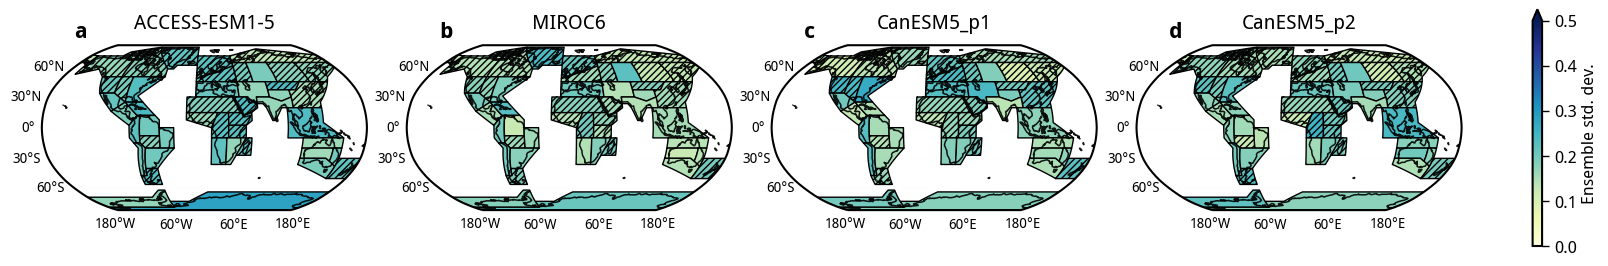

In [110]:
plot2(plot_list, title_list, labels_list, mpl.cm.YlGnBu, vmin=0, vmax=0.5, extend='max', cbar_label = 'Ensemble std. dev.', pval1 = pval_list1, \
     pval2=pval_list2, nrows=1, ncols=4, figsize=(16,6), ocean_mask_list = np.arange(0, 20, 1), mme_index_list=mme_index_list)
# plt.savefig(save_loc+'/supplementary/obs_rean_mmm_corr.png', dpi=300, bbox_inches='tight')

In [234]:
plot_list = [
             out_access.asymm.std('model').isel(season=1), out_miroc.asymm.std('model').isel(season=1), out_canesm.asymm.std('model').isel(season=1),
             out_access.asymm.std('model').isel(season=2), out_miroc.asymm.std('model').isel(season=2), out_canesm.asymm.std('model').isel(season=2),
             out_access.asymm.std('model').isel(season=3), out_miroc.asymm.std('model').isel(season=3), out_canesm.asymm.std('model').isel(season=3),
             out_access.asymm.std('model').isel(season=4), out_miroc.asymm.std('model').isel(season=4), out_canesm.asymm.std('model').isel(season=4),
            ]

In [238]:
pval_list1 = [
              out.enc_pval.isel(model = -2, season=1), out.enc_pval.isel(model = -2, season=1), out.enc_pval.isel(model = -2, season=1),
              out.enc_pval.isel(model = -2, season=2), out.enc_pval.isel(model = -2, season=2), out.enc_pval.isel(model = -2, season=2),
              out.enc_pval.isel(model = -2, season=3), out.enc_pval.isel(model = -2, season=3), out.enc_pval.isel(model = -2, season=3),
              out.enc_pval.isel(model = -2, season=4), out.enc_pval.isel(model = -2, season=4), out.enc_pval.isel(model = -2, season=4),
             ]
pval_list2 = [
              out.lnc_pval.isel(model = -2, season=1), out.lnc_pval.isel(model = -2, season=1), out.lnc_pval.isel(model = -2, season=1),
              out.lnc_pval.isel(model = -2, season=2), out.lnc_pval.isel(model = -2, season=2), out.lnc_pval.isel(model = -2, season=2),
              out.lnc_pval.isel(model = -2, season=3), out.lnc_pval.isel(model = -2, season=3), out.lnc_pval.isel(model = -2, season=3),
              out.lnc_pval.isel(model = -2, season=4), out.lnc_pval.isel(model = -2, season=4), out.lnc_pval.isel(model = -2, season=4),
             ]

In [236]:
title_list = [
              'DJF', 'DJF', 'DJF',
              'MAM', 'MAM', 'MAM',
              'JJA', 'JJA', 'JJA',
              'SON', 'SON', 'SON'
            ]

labels_list = ['a', 'b', 'c',
               'd', 'e', 'f',
               'g', 'h', 'i',
               'j', 'k', 'l',
            ]

mme_index_list = []

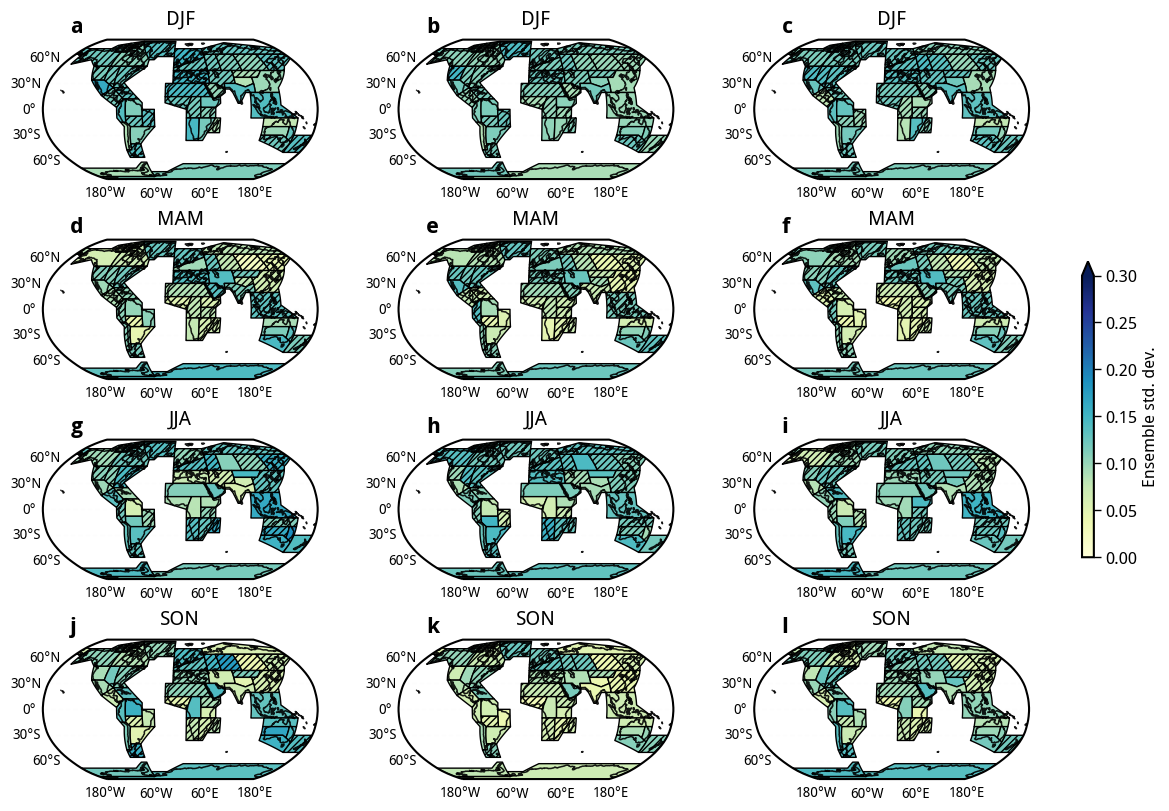

In [239]:
plot2(plot_list, title_list, labels_list, mpl.cm.YlGnBu, vmin=0, vmax=0.3, extend='max', cbar_label = 'Ensemble std. dev.', pval1 = pval_list1, \
     pval2=pval_list2, nrows=4, ncols=3, figsize=(12,8), ocean_mask_list = np.arange(0, 20, 1), mme_index_list=mme_index_list)
# plt.savefig(save_loc+'/supplementary/obs_rean_mmm_corr.png', dpi=300, bbox_inches='tight')

In [45]:
# functions to calculate correlation value
def get_corr_1d(x, y):
    statistic, _ = stats.spearmanr(x, y)
    return statistic


def get_pval_1d(x, y):
    _, pval = stats.spearmanr(x, y)
    return pval


def get_corr(x, y, dim):
    return xr.apply_ufunc(get_corr_1d, x, y, input_core_dims=[[dim], [dim]], vectorize=True, dask = 'parallelized')


def get_pval(x, y, dim):
    return xr.apply_ufunc(get_pval_1d, x, y, input_core_dims=[[dim], [dim]], vectorize=True, dask = 'parallelized')

In [83]:
pr_skw_asymm_corr = get_corr(out_access['pr_skw'], out_access['asymm'], dim='model')
pr_skw_asymm_pval = get_pval(out_access['pr_skw'], out_access['asymm'], dim='model')

n34_skw_asymm_corr = get_corr(out_access['n34_skw'], out_access['asymm'], dim='model')
n34_skw_asymm_pval = get_pval(out_access['n34_skw'], out_access['asymm'], dim='model')

n34_pr_skw_corr = get_corr(out_access['n34_skw'], out_access['pr_skw'], dim='model')
n34_pr_skw_pval = get_pval(out_access['n34_skw'], out_access['pr_skw'], dim='model')

In [84]:



def plot_maps2(z, titles, labels, cmap, vmin, vmax, cbar_label = 'Precip', pval = [], pval2=[], nrows=1, ncols=3, figsize=(12,4), ocean_mask_list = [], show_colorbar=True, extend='neither'):
    cmap.set_bad('white',1.)
    pg = regionmask.defined_regions.ar6.land.polygons
    fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True, subplot_kw={'projection':ccrs.Robinson(central_longitude=0)})
    
    axlist = axarr.flatten()
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    for i in range(len(z)):
        min_val, max_val = min(z[i]), max(z[i])
        # colors = cmap(plt.Normalize(min_val, max_val)(z[i]))
        colors = cmap(plt.Normalize(vmin, vmax)(z[i]))
        
        for j in range(len(z[i])):
            if pval != [] and pval2 == []:
                if pval[i][j] > 0.05:
                    axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='////')
                else:
                    axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='')
            elif pval != [] and pval2 != []:
                # if pval[i][j] > 0.05 and pval2[i][j] == 1:
                if pval[i][j] > 0.05:
                    axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='////')
                # elif pval[i][j] > 0.05 and pval2[i][j] == 0:
                elif pval2[i][j] == 0:
                    axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='////')
                else:
                    axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='')
            else:
                axlist[i].add_geometries(pg[j], crs=ccrs.PlateCarree(), facecolor=list(colors)[j], edgecolor='k', alpha=1.0, hatch='')
        axlist[i].set_title(titles[i], loc='center', y=1.05)
        axlist[i].text(0.1, 1.05, labels[i], size=16, fontweight='bold', transform=axlist[i].transAxes)
        if i in ocean_mask_list:
            axlist[i].add_feature(cfeature.OCEAN, color = 'white', zorder=1)
            
    for ax in axlist:
        plot_background(ax)
        
    if show_colorbar == True:
        plt.colorbar(m.cm.ScalarMappable(norm = norm, cmap=cmap), ax = axlist, \
                    orientation = 'vertical', shrink=0.4, aspect = 25, pad = 0.05, label = cbar_label, extend=extend)

In [85]:
plot_list = [n34_skw_asymm_corr.sel(season='ANN'), pr_skw_asymm_corr.sel(season='ANN'), n34_pr_skw_corr.sel(season='ANN'),
             n34_skw_asymm_corr.sel(season='DJF'), pr_skw_asymm_corr.sel(season='DJF'), n34_pr_skw_corr.sel(season='DJF'),
             n34_skw_asymm_corr.sel(season='MAM'), pr_skw_asymm_corr.sel(season='MAM'), n34_pr_skw_corr.sel(season='MAM'),
             n34_skw_asymm_corr.sel(season='JJA'), pr_skw_asymm_corr.sel(season='JJA'), n34_pr_skw_corr.sel(season='JJA'),
             n34_skw_asymm_corr.sel(season='SON'), pr_skw_asymm_corr.sel(season='SON'), n34_pr_skw_corr.sel(season='SON'),
             ]

In [86]:
pval_list = [n34_skw_asymm_pval.sel(season='ANN'), pr_skw_asymm_pval.sel(season='ANN'), n34_pr_skw_pval.sel(season='ANN'),
             n34_skw_asymm_pval.sel(season='DJF'), pr_skw_asymm_pval.sel(season='DJF'), n34_pr_skw_pval.sel(season='DJF'),
             n34_skw_asymm_pval.sel(season='MAM'), pr_skw_asymm_pval.sel(season='MAM'), n34_pr_skw_pval.sel(season='MAM'),
             n34_skw_asymm_pval.sel(season='JJA'), pr_skw_asymm_pval.sel(season='JJA'), n34_pr_skw_pval.sel(season='JJA'),
             n34_skw_asymm_pval.sel(season='SON'), pr_skw_asymm_pval.sel(season='SON'), n34_pr_skw_pval.sel(season='SON'),
             ]

In [87]:
title_list = ['ANN', 'ANN', 'ANN',
              'DJF', 'DJF', 'DJF',
              'MAM', 'MAM', 'MAM',
              'JJA', 'JJA', 'JJA',
              'SON', 'SON', 'SON']

labels_list = ['a', 'b', 'c',
               'd', 'e', 'f',
               'g', 'h', 'i',
               'j', 'k', 'l',
               'm', 'n', 'o']

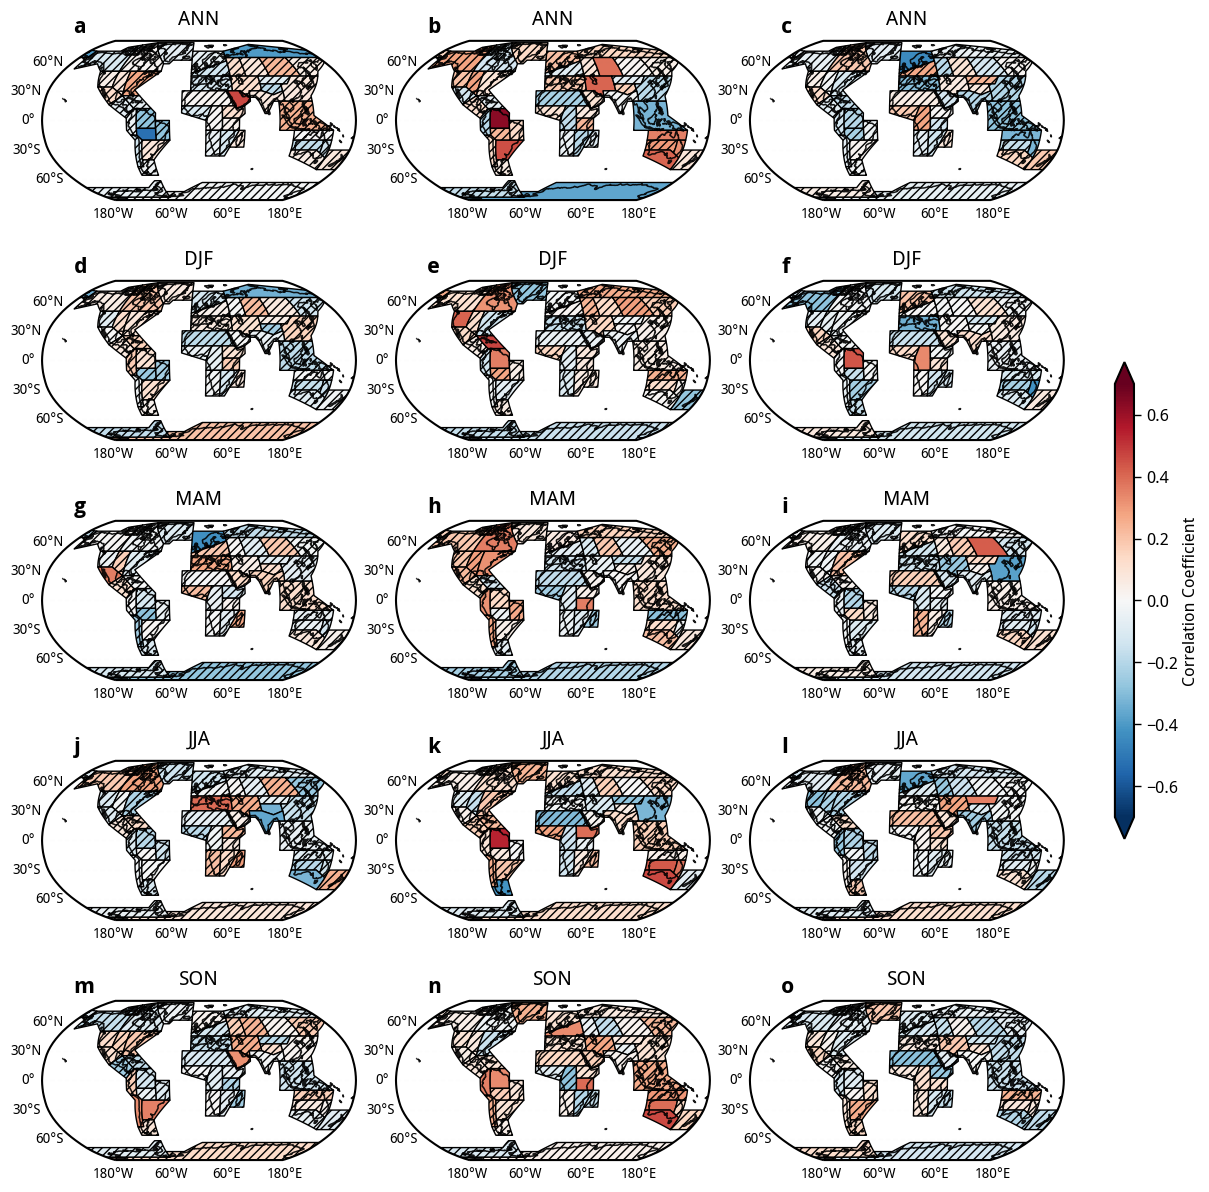

In [88]:
plot_maps2(plot_list, title_list, labels_list, cmap=mpl.cm.RdBu_r, vmin=-0.7, vmax=0.7, extend='both', cbar_label = 'Correlation Coefficient', \
          pval=pval_list, pval2=[], nrows=5, ncols=3, figsize=(12,12), ocean_mask_list = np.arange(0,25,1))
# plt.savefig('./images/model_perf/skewness_effect.png', dpi=300, bbox_inches='tight')

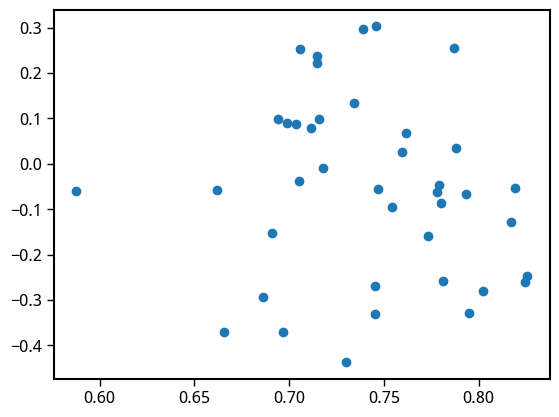

In [97]:
plt.scatter(out_access.threshold, out_access.isel(region=41, season=0).asymm)